Note: Might need to run the notebook again to view the plotly line graphs under regional eda. Our notebook does take a while (about 15 minutes) to run due to our ML models. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Data cleaning

In [2]:
df = pd.read_csv('who_life_exp.csv')
df.head()

country country_code  region  year  life_expect  life_exp60  \
0  Angola          AGO  Africa  2000     47.33730    14.73400   
1  Angola          AGO  Africa  2001     48.19789    14.95963   
2  Angola          AGO  Africa  2002     49.42569    15.20010   
3  Angola          AGO  Africa  2003     50.50266    15.39144   
4  Angola          AGO  Africa  2004     51.52863    15.56860   

   adult_mortality  infant_mort  age1-4mort  alcohol  ...  che_gdp    une_pop  \
0         383.5583     0.137985    0.025695  1.47439  ...  1.90860  16395.473   
1         372.3876     0.133675    0.024500  1.94025  ...  4.48352  16945.753   
2         354.5147     0.128320    0.023260  2.07512  ...  3.32946  17519.417   
3         343.2169     0.122040    0.021925  2.20275  ...  3.54797  18121.479   
4         333.8711     0.115700    0.020545  2.41274  ...  3.96720  18758.145   

   une_infant  une_life  une_hiv  une_gni  une_poverty  une_edu_spend  \
0       122.2    46.522      1.0   2530.0         32.3        2.60753   
1       118.9    47.059      1.1   2630.0          NaN            NaN   
2       115.1    47.702      1.2   3180.0          NaN            NaN   
3       110.8    48.440      1.3   3260.0          NaN            NaN   
4       106.2    49.263      1.3   3560.0          NaN            NaN   

   une_literacy  une_school  
0           NaN         NaN  
1      67.40542         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  

[5 rows x 32 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [4]:
df.isna().sum()

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

We decided to drop the UNESCO variables(une_ ) because they overlap with the predictors in GHO dataset. The reason why we chose GHO variables over UNESCO variables is because some of the UNESCO variables have more than 70% null data, e.g. une_poverty, une_edu_spend, une_literacy, une_school. However, we retained une_pop and une_hiv because these two variables are not found in GHO dataset.


In [5]:
df.drop(['une_infant', 'une_life', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school'], 
        axis = 1, inplace = True)

We decided to drop the 'hospitals' variable because there is 96% of missing values in that column. 
We also dropped the 'country_code' column because 'country' column itself is sufficient for reference.

In [6]:
df.drop(['hospitals'], axis = 1, inplace = True)
df.drop(['country_code'], axis = 1, inplace =True)

In [7]:
mortality = pd.DataFrame(df[['adult_mortality', 'infant_mort', 'age1-4mort']])
mortality.head()

adult_mortality  infant_mort  age1-4mort
0         383.5583     0.137985    0.025695
1         372.3876     0.133675    0.024500
2         354.5147     0.128320    0.023260
3         343.2169     0.122040    0.021925
4         333.8711     0.115700    0.020545

The values of adult mortality are rate per 1000 populations thus we convert it into the same format as the other two mortality rate in order to ease the EDA.

In [8]:
for i in range(0, 3111):
    val = df.iloc[i]['adult_mortality']
    adjusted_val = val/1000 
    df.at[i, 'adult_mortality'] = adjusted_val

In [9]:
df.rename(columns = {'adult_mortality':'adult_mort_rate', 'infant_mort':'infant_mort_rate', 'age1-4mort':'age1-4_mort_rate'}, 
          inplace = True)

In [10]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               50
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Checking missing values under 'alcohol' column

In [11]:
df[df['alcohol'].isna()]['country'].value_counts()

South Sudan    17
Sudan          11
Serbia          6
Montenegro      6
Afghanistan     5
Canada          5
Name: country, dtype: int64

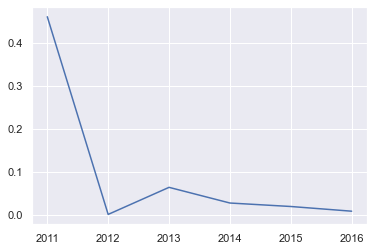

In [12]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
plt.plot('year', 'alcohol', data = sudan_df)

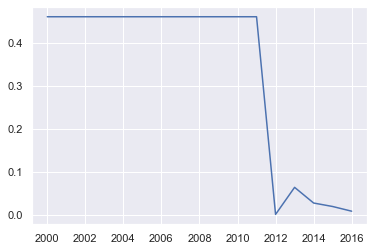

In [13]:
sudan_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

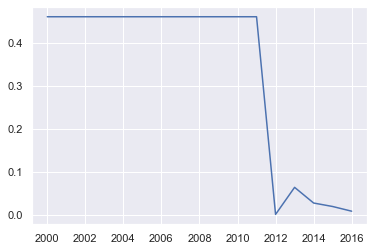

In [14]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

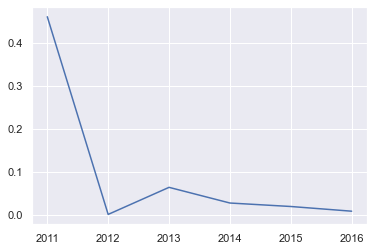

In [15]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

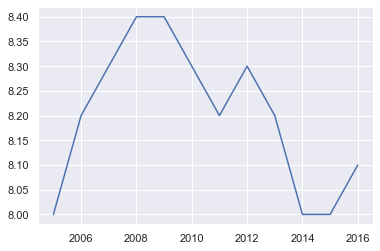

In [16]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])
plt.plot('year', 'alcohol', data = canada_df)

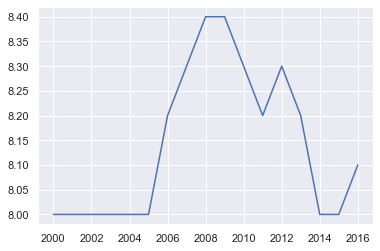

In [17]:
canada_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)
plt.plot('year', 'alcohol', data = canada_df)

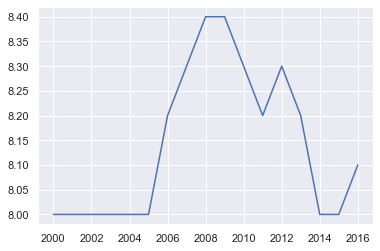

In [18]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

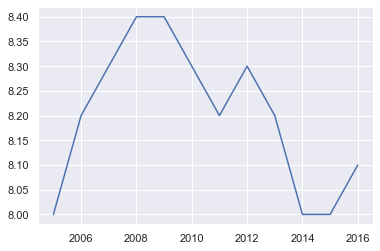

In [19]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

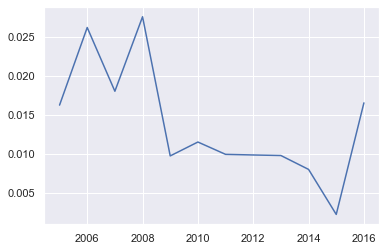

In [20]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
plt.plot('year', 'alcohol', data = afg_df)

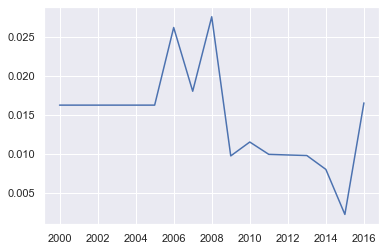

In [21]:
afg_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

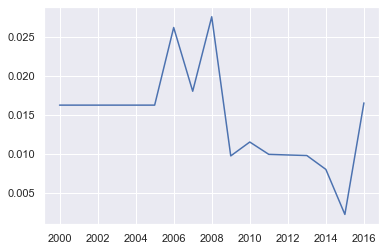

In [22]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

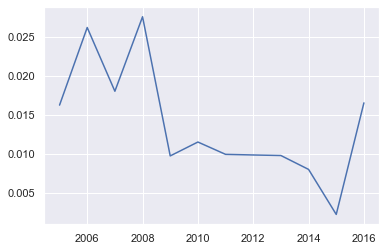

In [23]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

Forward filling method is not suitable to fill in the null values for alcohol variable because the missing values would be dependent on the few earliest years. Thus, forward filling will not be used to fill in the null values for other variables as well in case the missing values of other variables are also from the earliest year.

## Checking out other variables to figure out whether backward filling or interpolation will be a better way to fill in NaN values

In [24]:
df[df['gni_capita'].isna()]['country'].value_counts()

Democratic People's Republic of Korea    17
Argentina                                17
Syrian Arab Republic                     17
Somalia                                  17
Myanmar                                  17
                                         ..
Seychelles                                3
Republic of Moldova                       3
Venezuela (Bolivarian Republic of)        3
Republic of Korea                         3
Tonga                                     3
Name: country, Length: 183, dtype: int64

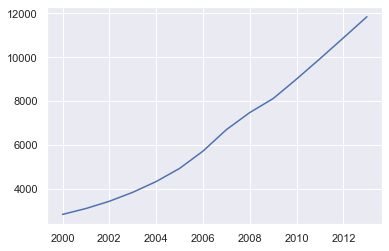

In [25]:
china_df = pd.DataFrame(df[df['country'] == 'China'])
plt.plot('year', 'gni_capita', data = china_df)

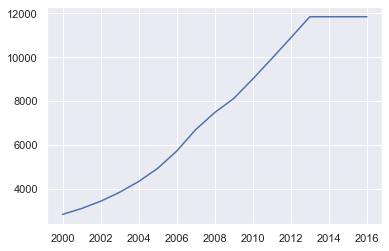

In [26]:
china_df['gni_capita'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)
plt.plot('year', 'gni_capita', data = china_df)

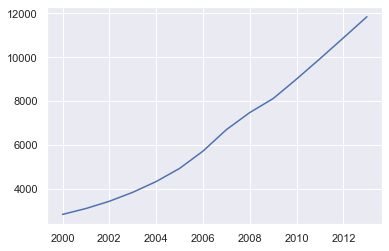

In [27]:
china_df = pd.DataFrame(df[df['country'] == 'China'])
china_df.bfill(inplace = True)
plt.plot('year', 'gni_capita', data = china_df)

Backward filling does not work to fill in null values of gni per capita. This is because the missing values are from the recent years. Thus, we decided to use interpolation with linear method.


Filling in null values for 'hepatitis' column:

In [28]:
null_df = pd.DataFrame(df[df['hepatitis'].isna()]['country'].value_counts())
pd.set_option('display.max_rows',null_df.shape[0]+1)
print(null_df)


                                                    country
Finland                                                  17
Slovenia                                                 17
Switzerland                                              17
Hungary                                                  17
Norway                                                   17
Japan                                                    17
United Kingdom of Great Britain and Northern Ir...       17
Iceland                                                  17
Denmark                                                  17
South Sudan                                              15
Equatorial Guinea                                        14
Somalia                                                  13
Haiti                                                    13
Netherlands                                              11
Sweden                                                   11
Namibia                                 

<AxesSubplot:xlabel='Countries', ylabel='No of NaN Values'>

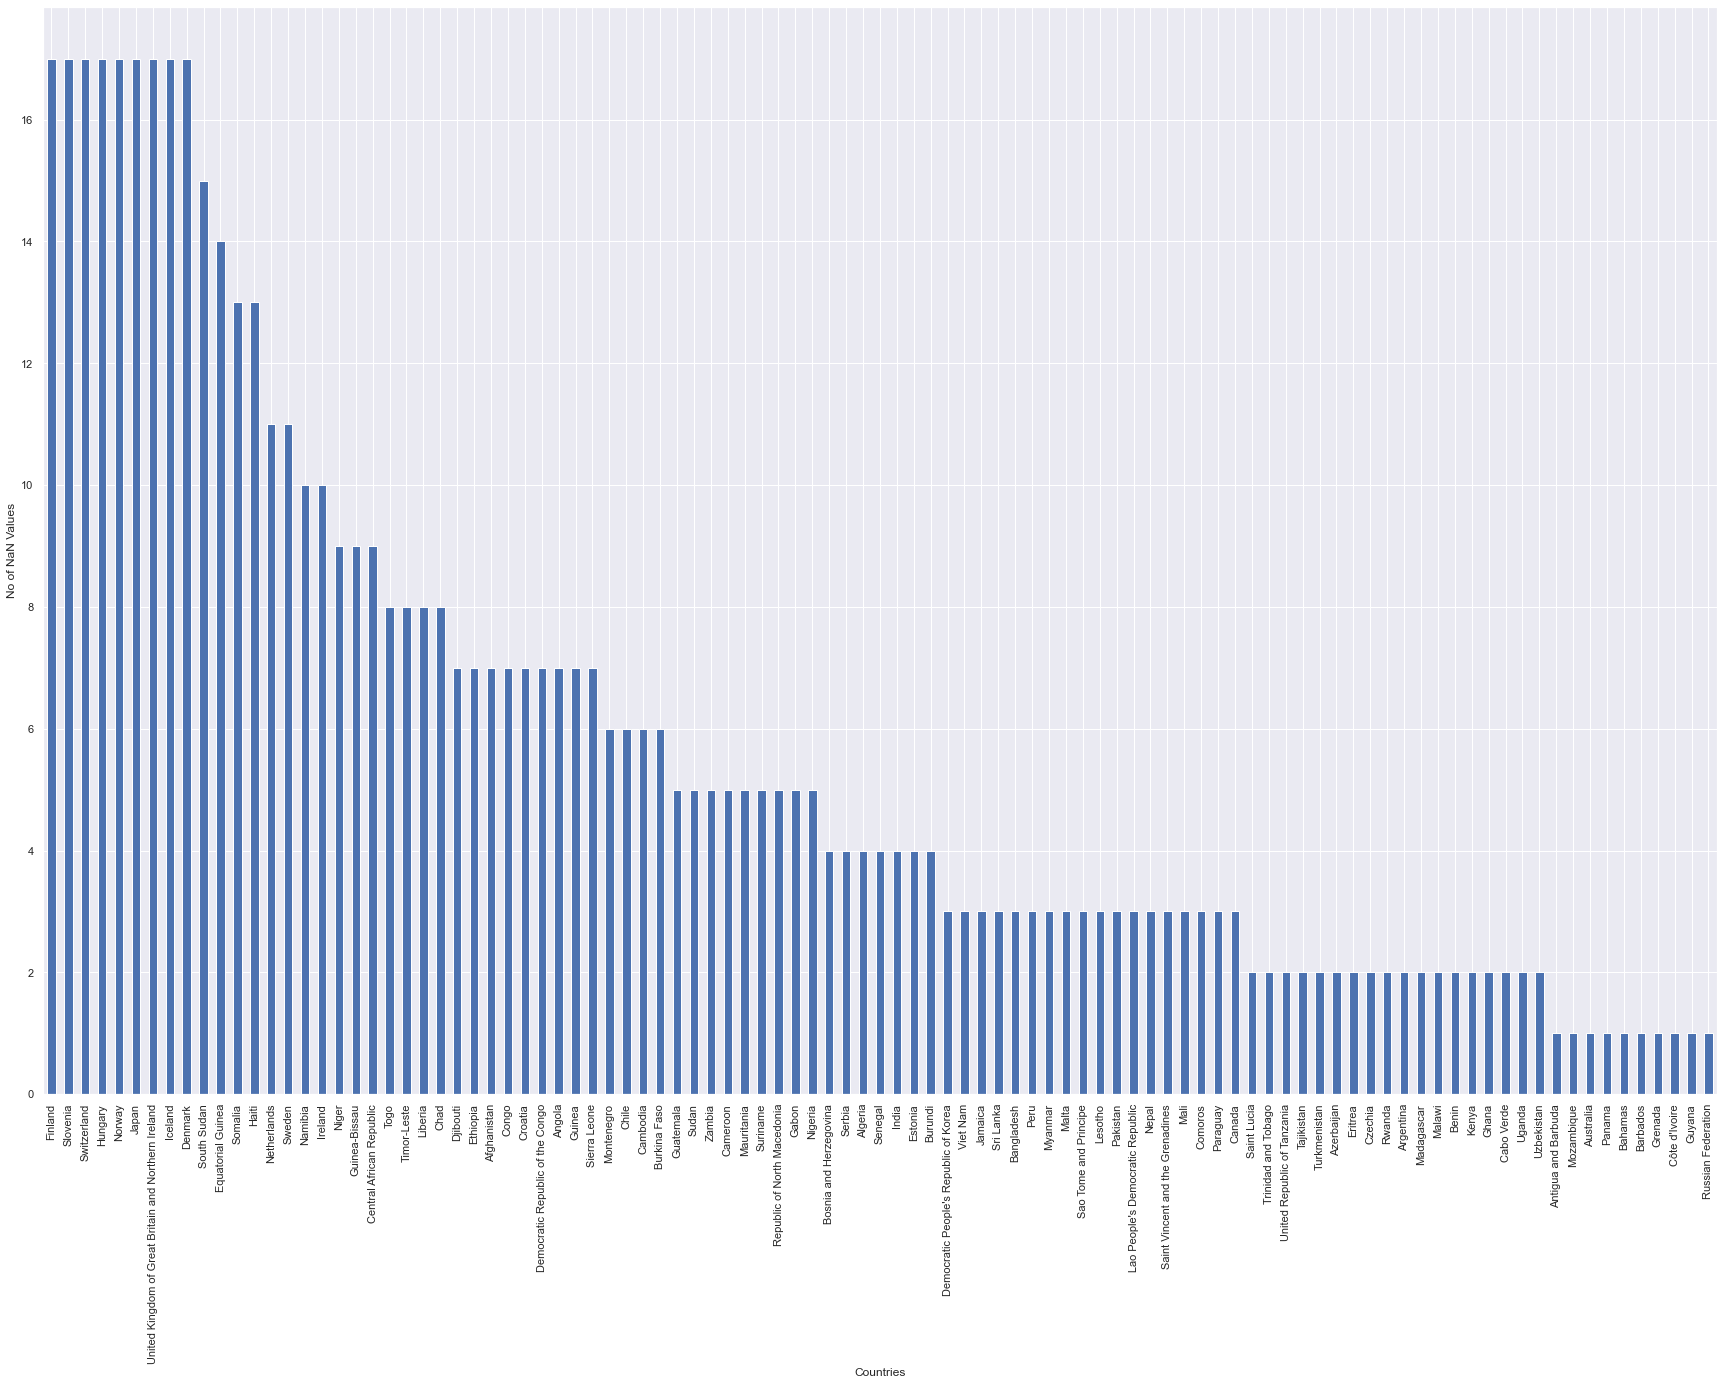

In [29]:
df[df['hepatitis'].isna()]['country'].value_counts().plot(kind = 'bar', figsize = (30, 20), xlabel = 'Countries', 
                                                          ylabel = 'No of NaN Values')

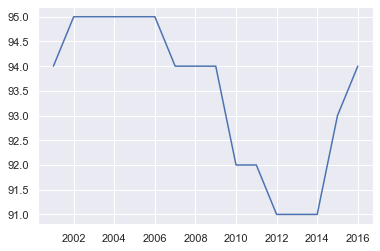

In [30]:
aus_df = pd.DataFrame(df[df['country'] == 'Australia'])
plt.plot('year', 'hepatitis', data = aus_df)

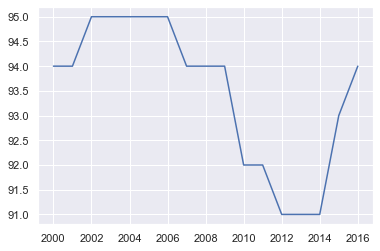

In [31]:
aus_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)
plt.plot('year', 'hepatitis', data = aus_df)

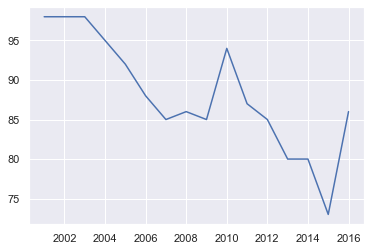

In [32]:
pnm_df = pd.DataFrame(df[df['country'] == 'Panama'])
plt.plot('year', 'hepatitis', data = pnm_df)

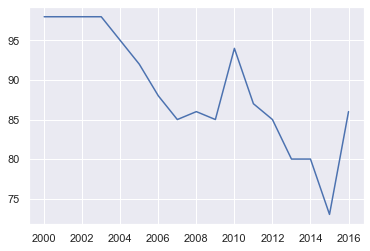

In [33]:
pnm_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)
plt.plot('year', 'hepatitis', data = pnm_df)

From the graphs below, we can see that some countries e.g. Japan completely don't have any values over 17 years as shown below.

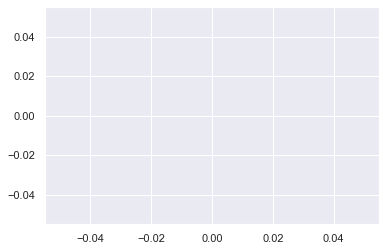

In [34]:
jpn_df = pd.DataFrame(df[df['country'] == 'Japan'])
plt.plot('year', 'hepatitis', data = jpn_df)

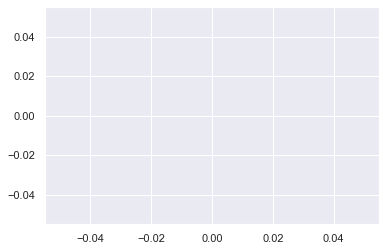

In [35]:
jpn_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)
plt.plot('year', 'hepatitis', data = jpn_df)

We have tested that interpolation with linear method works well in filling in the null values for hepatitis. 

However, it is clearly shown in the bar chart that a lot of countries are missing out the values for hepatitis from 2000-2016.
We checked against the GHO website and realised the reason behind the null values is because GHO did not have the data for those countries.

For these countries, we thought of either filling them with the artificial datas (i.e. global mean/median value) or leaving them as null values. In the end, we decided to use the second approach over the first one because we think that filling in null values with artificial datas would contribute to higher inaccuracy and bias. 

In addition to this, interpolation method does not work if the country has missing values for all the years. Thus, we decided not to fill in the null values for countries with many null values.

In conclusion, we define a fill_na function which fills in missing values with linear interpolation when the condition(<=10 missing values for each country) is met. 

## Define fill_na method

In [36]:
def fill_na(pred, country):
    if len(df[df[pred].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc(pred)
        pred_df = pd.DataFrame(df.iloc[row_index, col_index])
        pred_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = pred_df

In [37]:
countries = df[df['hepatitis'].isna()]['country'].unique().tolist()

In [38]:
null_pred = df.columns[df.isna().any()].tolist()

In [39]:
null_pred

['alcohol',
 'bmi',
 'age5-19thinness',
 'age5-19obesity',
 'hepatitis',
 'measles',
 'polio',
 'diphtheria',
 'basic_water',
 'doctors',
 'gni_capita',
 'gghe-d',
 'che_gdp',
 'une_pop',
 'une_hiv']

In [40]:
for pred in null_pred:
    countries = df[df[pred].isna()]['country'].unique().tolist()
    for country in countries:
        fill_na(pred, country)

<ipython-input-36-771e9a623dd2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [41]:
df.isna().sum()

country               0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mort_rate       0
infant_mort_rate      0
age1-4_mort_rate      0
alcohol              28
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           230
measles              11
polio                11
diphtheria           11
basic_water          11
doctors             895
gni_capita          107
gghe-d               68
che_gdp              85
une_pop              31
une_hiv             731
dtype: int64

# Exploratory Analysis

In [42]:
df.dtypes

country              object
region               object
year                  int64
life_expect         float64
life_exp60          float64
adult_mort_rate     float64
infant_mort_rate    float64
age1-4_mort_rate    float64
alcohol             float64
bmi                 float64
age5-19thinness     float64
age5-19obesity      float64
hepatitis           float64
measles             float64
polio               float64
diphtheria          float64
basic_water         float64
doctors             float64
gni_capita          float64
gghe-d              float64
che_gdp             float64
une_pop             float64
une_hiv             float64
dtype: object

# Outliers


In [43]:
df.shape

(3111, 23)

Creating a copy of cleaned data frame

In [44]:
new_df = pd.DataFrame(df)
new_df.info()
new_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           3111 non-null   object 
 1   region            3111 non-null   object 
 2   year              3111 non-null   int64  
 3   life_expect       3111 non-null   float64
 4   life_exp60        3111 non-null   float64
 5   adult_mort_rate   3111 non-null   float64
 6   infant_mort_rate  3111 non-null   float64
 7   age1-4_mort_rate  3111 non-null   float64
 8   alcohol           3083 non-null   float64
 9   bmi               3077 non-null   float64
 10  age5-19thinness   3077 non-null   float64
 11  age5-19obesity    3077 non-null   float64
 12  hepatitis         2881 non-null   float64
 13  measles           3100 non-null   float64
 14  polio             3100 non-null   float64
 15  diphtheria        3100 non-null   float64
 16  basic_water       3100 non-null   float64


(3111, 23)

Dropped the categorical features in order to analyse numeric features first

In [45]:
df_numeric = df.drop(labels= ['country','region','year'],axis=1)
df_numeric.info()
df_numeric.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   life_expect       3111 non-null   float64
 1   life_exp60        3111 non-null   float64
 2   adult_mort_rate   3111 non-null   float64
 3   infant_mort_rate  3111 non-null   float64
 4   age1-4_mort_rate  3111 non-null   float64
 5   alcohol           3083 non-null   float64
 6   bmi               3077 non-null   float64
 7   age5-19thinness   3077 non-null   float64
 8   age5-19obesity    3077 non-null   float64
 9   hepatitis         2881 non-null   float64
 10  measles           3100 non-null   float64
 11  polio             3100 non-null   float64
 12  diphtheria        3100 non-null   float64
 13  basic_water       3100 non-null   float64
 14  doctors           2216 non-null   float64
 15  gni_capita        3004 non-null   float64
 16  gghe-d            3043 non-null   float64


(3111, 20)

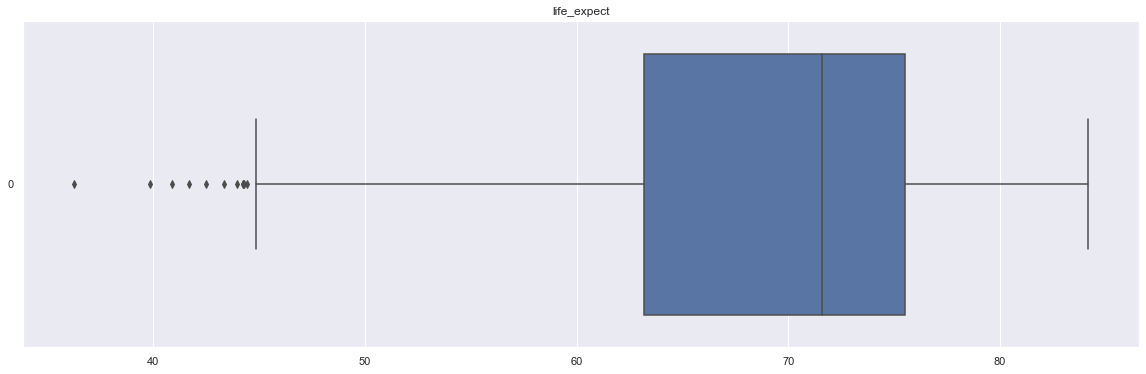

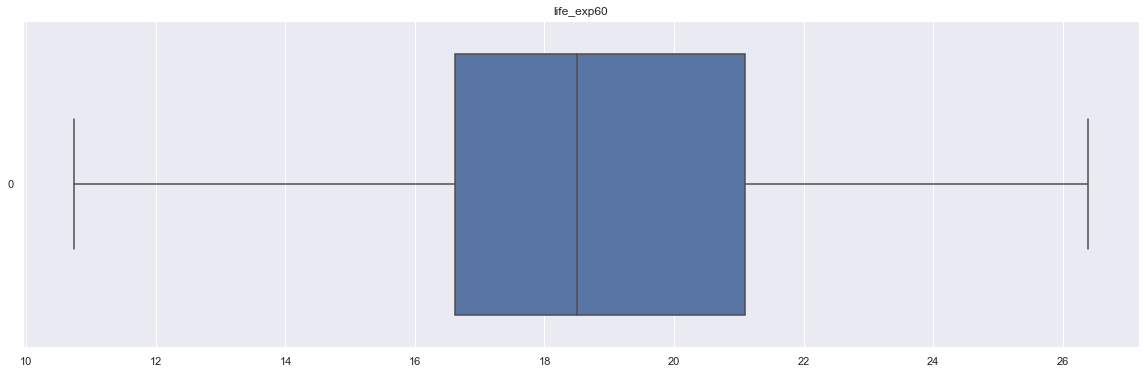

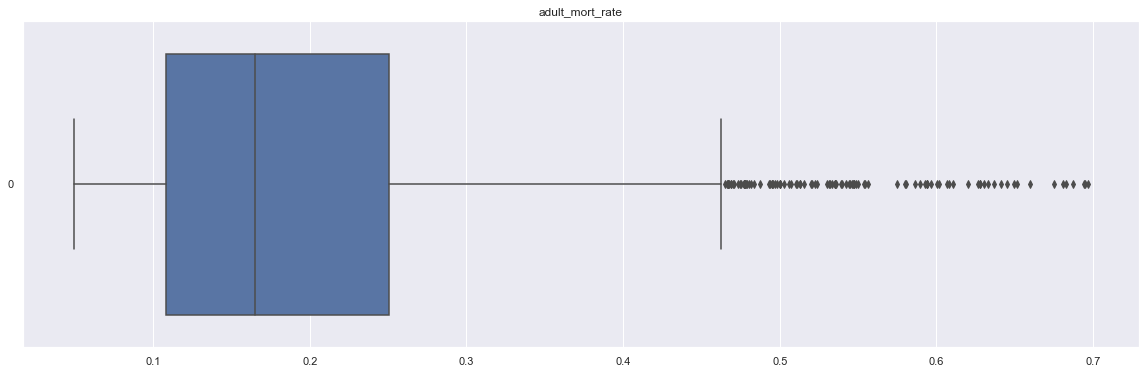

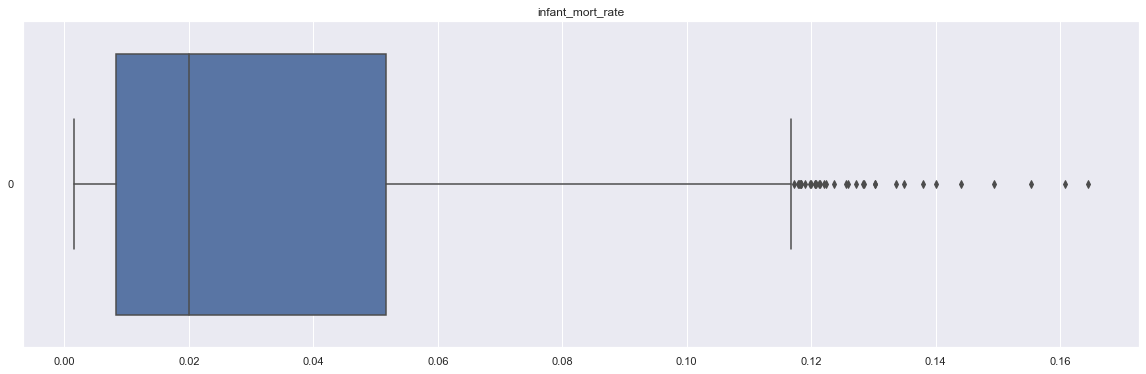

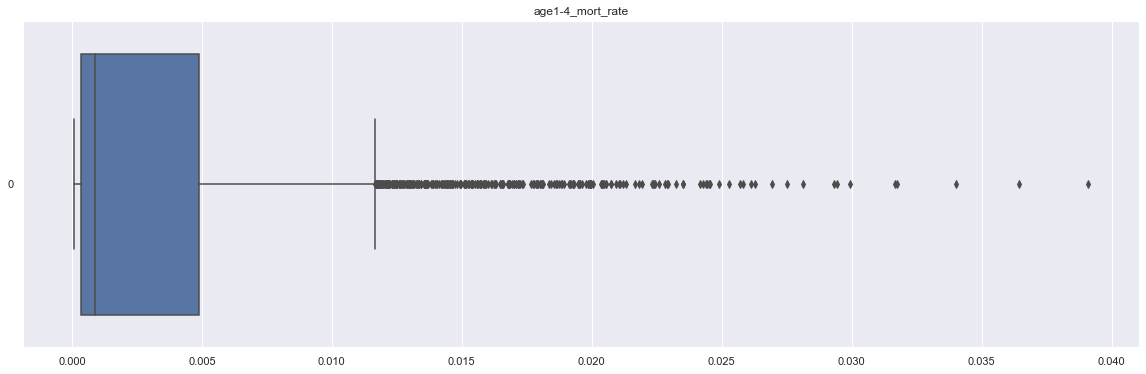

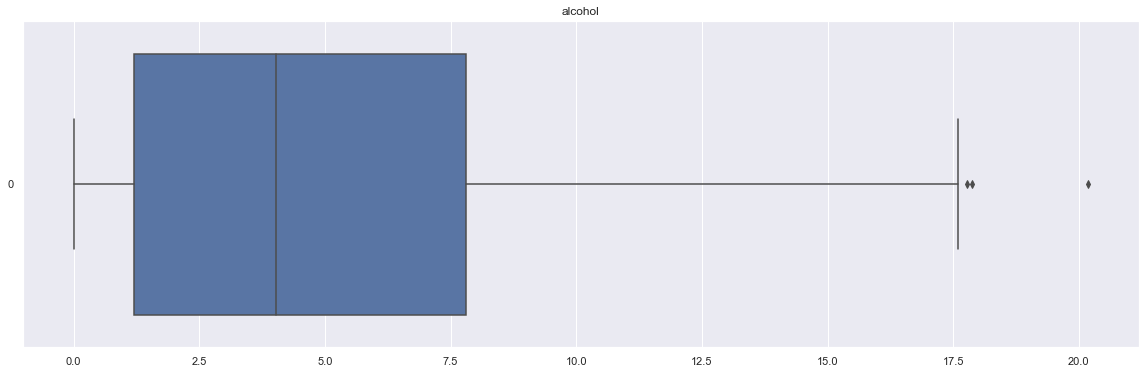

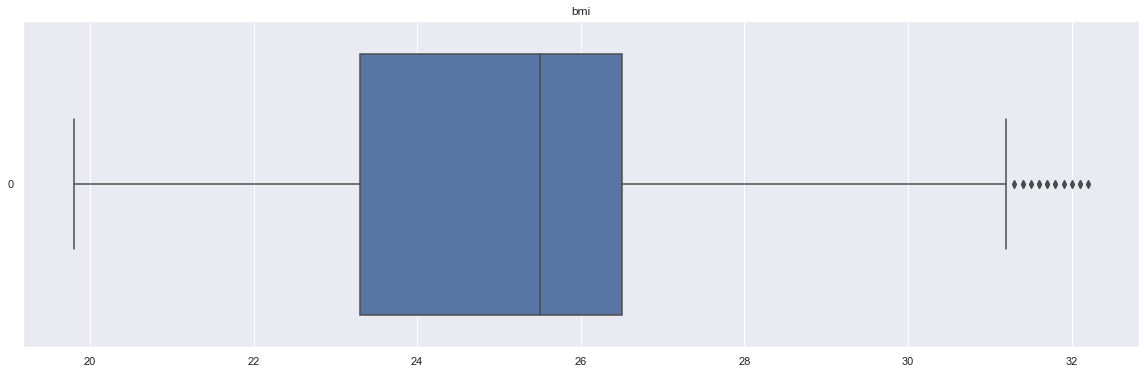

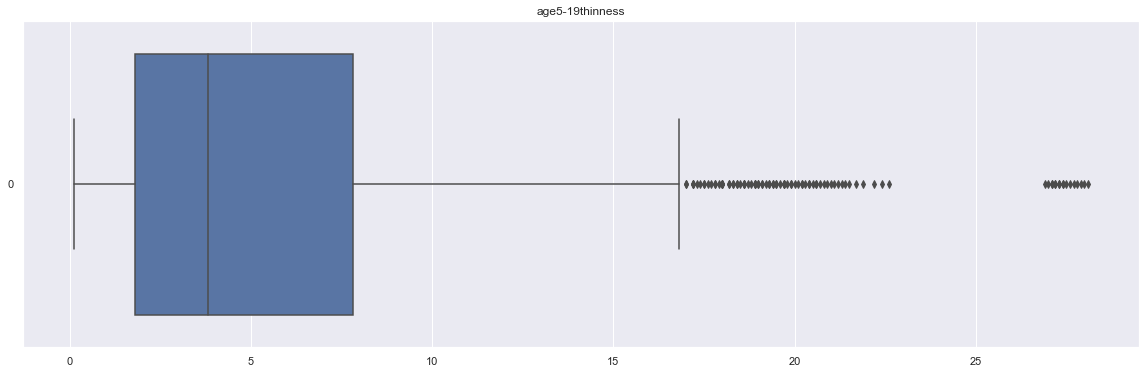

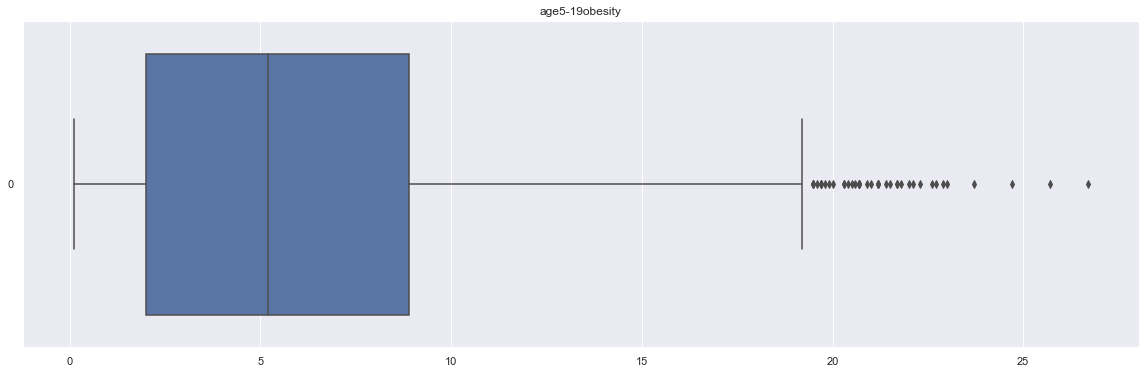

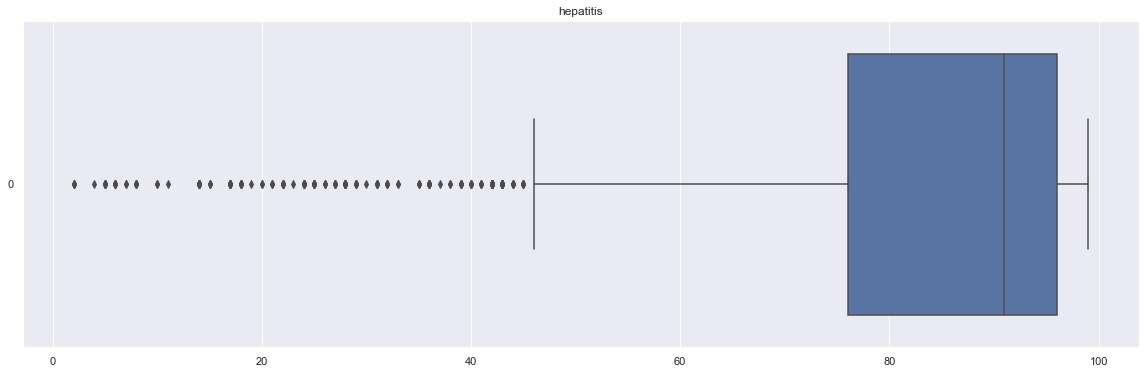

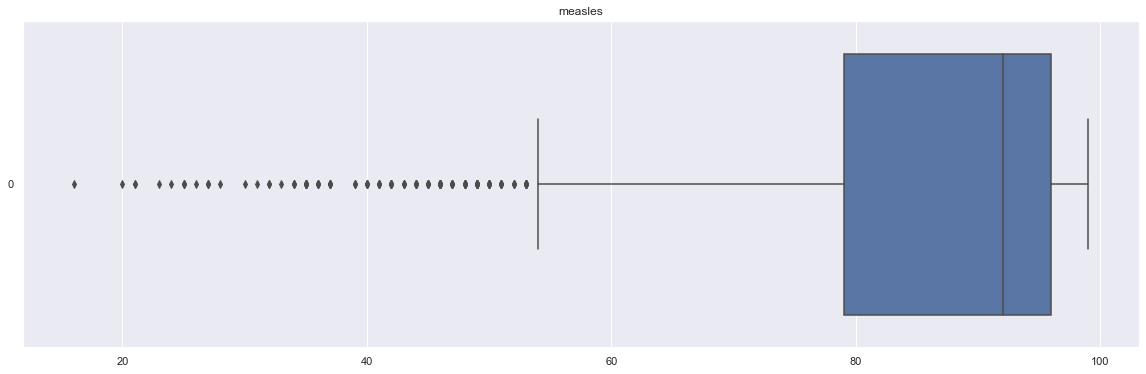

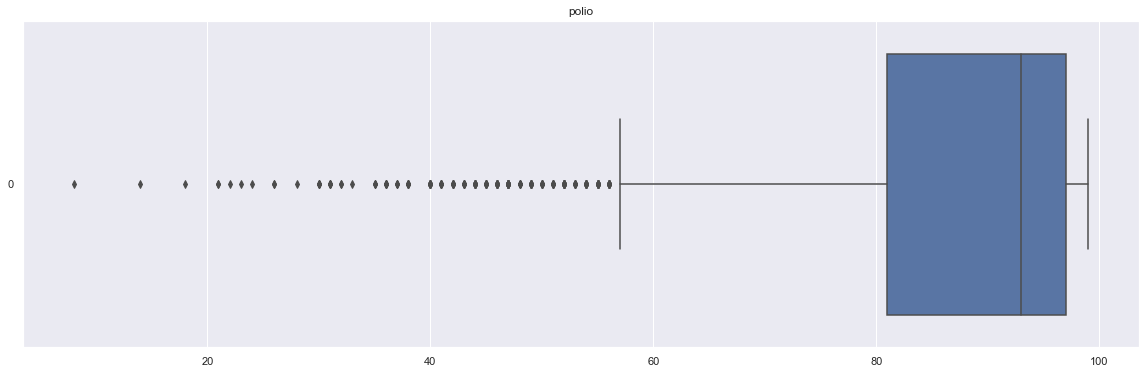

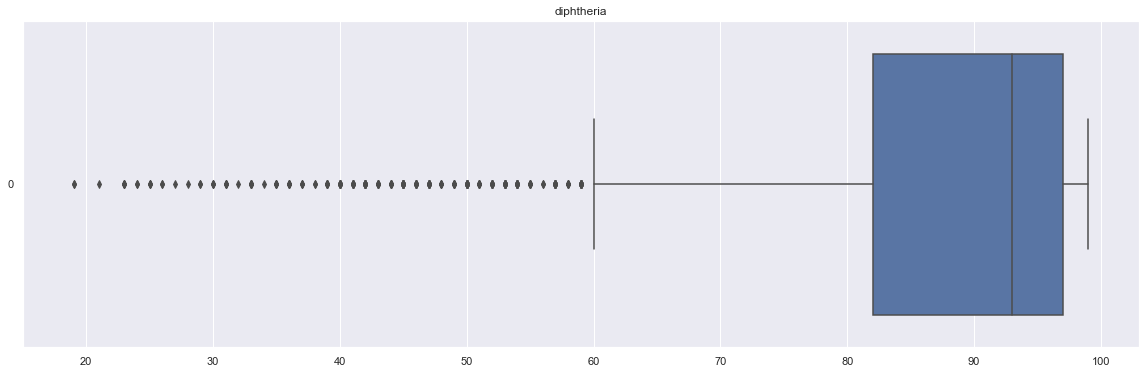

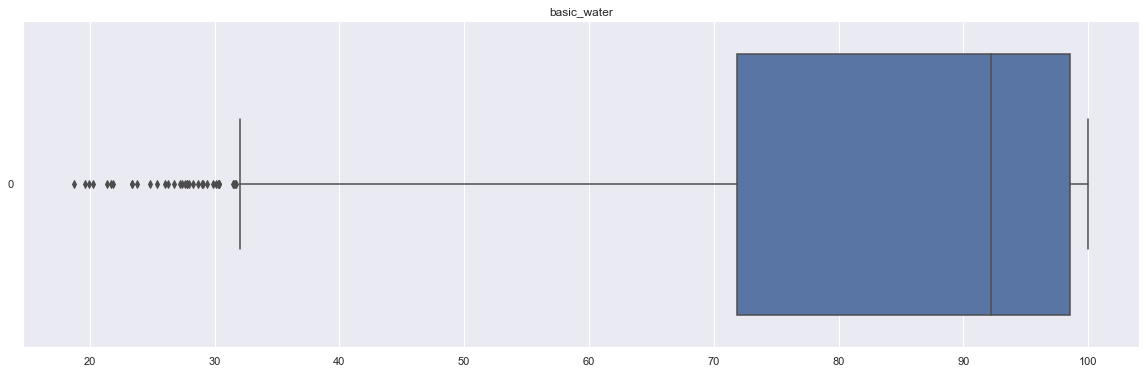

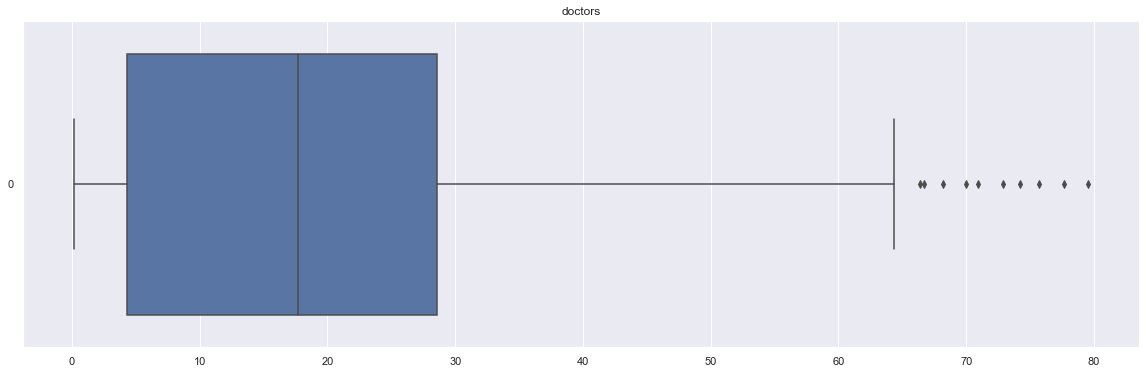

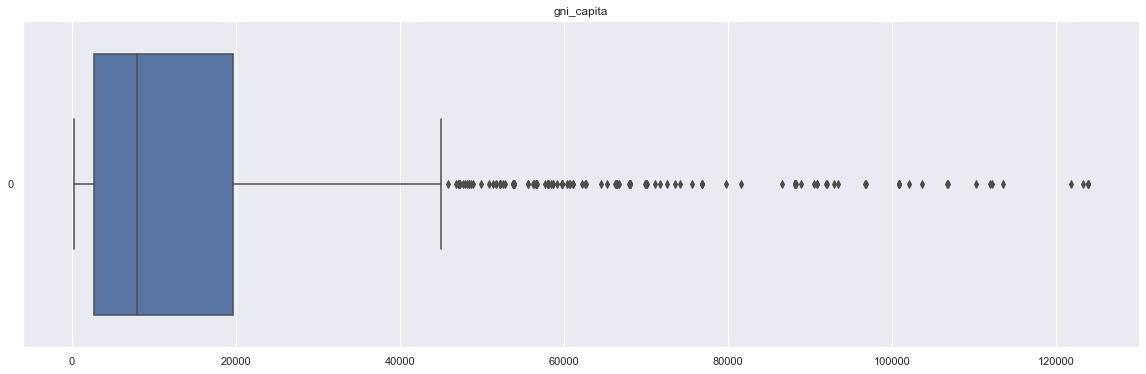

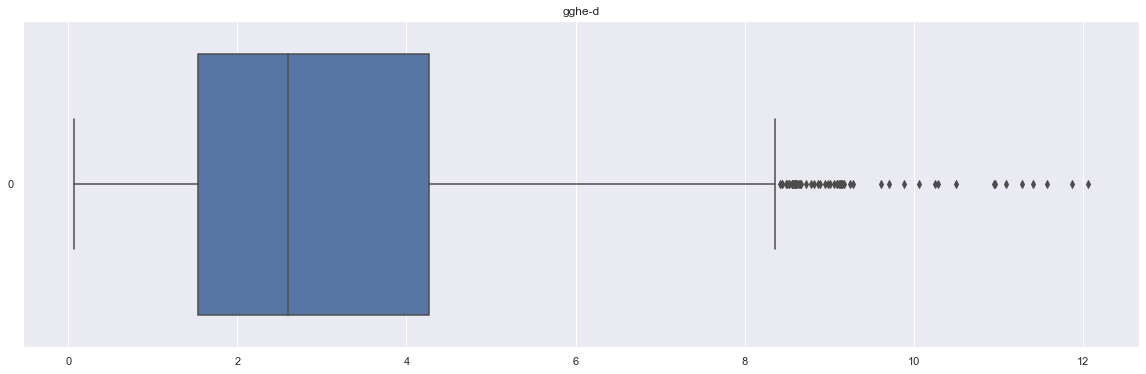

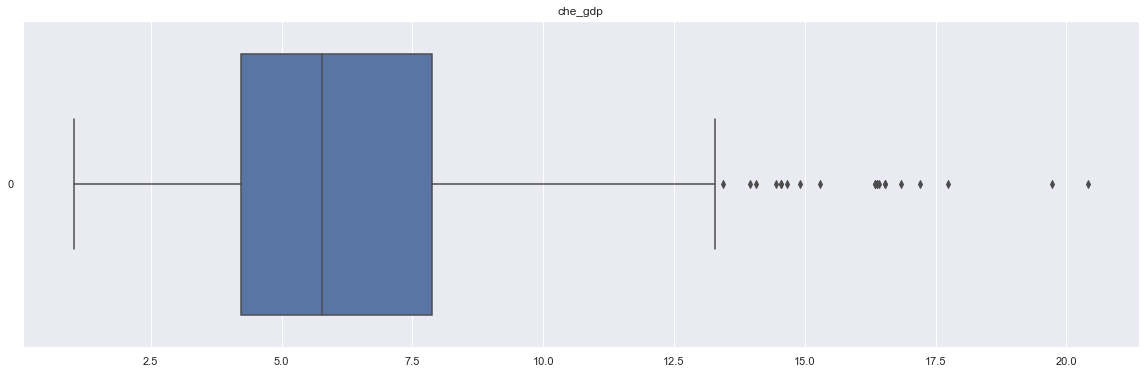

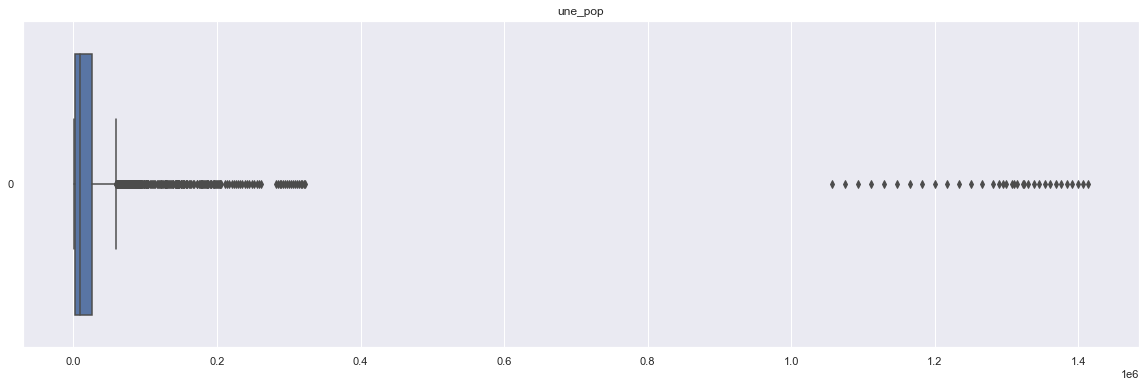

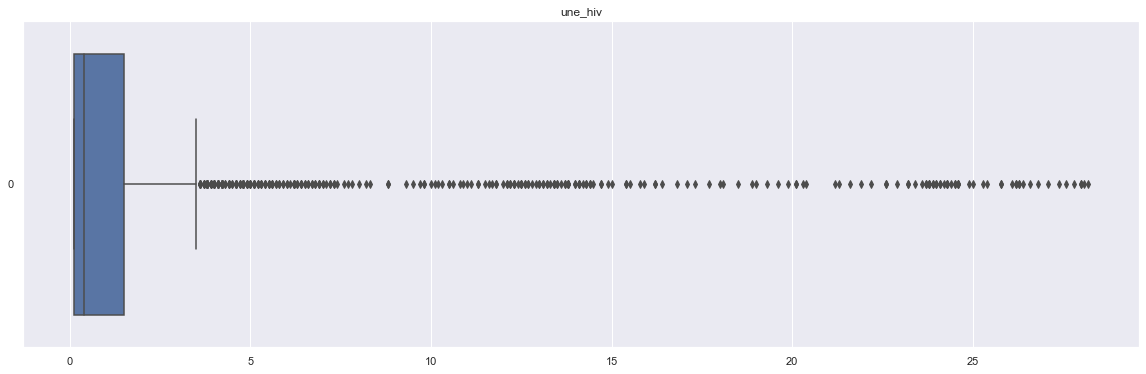

In [46]:
for var in df_numeric:
    f = plt.figure(figsize=(20,6))
    sb.boxplot(data = df_numeric[var], orient = "h").set_title(var)

In [47]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
outlier = ((df_numeric < (Q1 - 1.5 * (Q3 - Q1))) | (df_numeric > (Q3 + 1.5 * (Q3 - Q1))))
outlier.sum().sort_values()

life_exp60            0
alcohol               3
doctors              10
life_expect          11
che_gdp              21
bmi                  25
infant_mort_rate     33
basic_water          35
age5-19obesity       40
gghe-d               55
age5-19thinness      92
adult_mort_rate     102
gni_capita          141
measles             164
polio               203
hepatitis           235
diphtheria          244
age1-4_mort_rate    271
une_hiv             309
une_pop             365
dtype: int64

une_pop has the greatest number of outliers followed by une_hiv. life_exp60 has the lowest amount of outliers followed by alcohol.

# Global 

## Find the potential top 5 predictors of LE globally 

In [48]:
print(df_numeric.corr())

                  life_expect  life_exp60  adult_mort_rate  infant_mort_rate  \
life_expect          1.000000    0.886159        -0.946419         -0.930113   
life_exp60           0.886159    1.000000        -0.775321         -0.769839   
adult_mort_rate     -0.946419   -0.775321         1.000000          0.813210   
infant_mort_rate    -0.930113   -0.769839         0.813210          1.000000   
age1-4_mort_rate    -0.864414   -0.661082         0.756230          0.909032   
alcohol              0.402975    0.465281        -0.250410         -0.448747   
bmi                  0.597996    0.458839        -0.517095         -0.641874   
age5-19thinness     -0.565396   -0.556536         0.455205          0.578230   
age5-19obesity       0.621000    0.547764        -0.571792         -0.602402   
hepatitis            0.398373    0.299663        -0.326215         -0.470327   
measles              0.640817    0.505314        -0.526452         -0.720781   
polio                0.646339    0.50197

## Heatmap of numeric variables
<a id='df_numeric_heatmap'></a>

<AxesSubplot:>

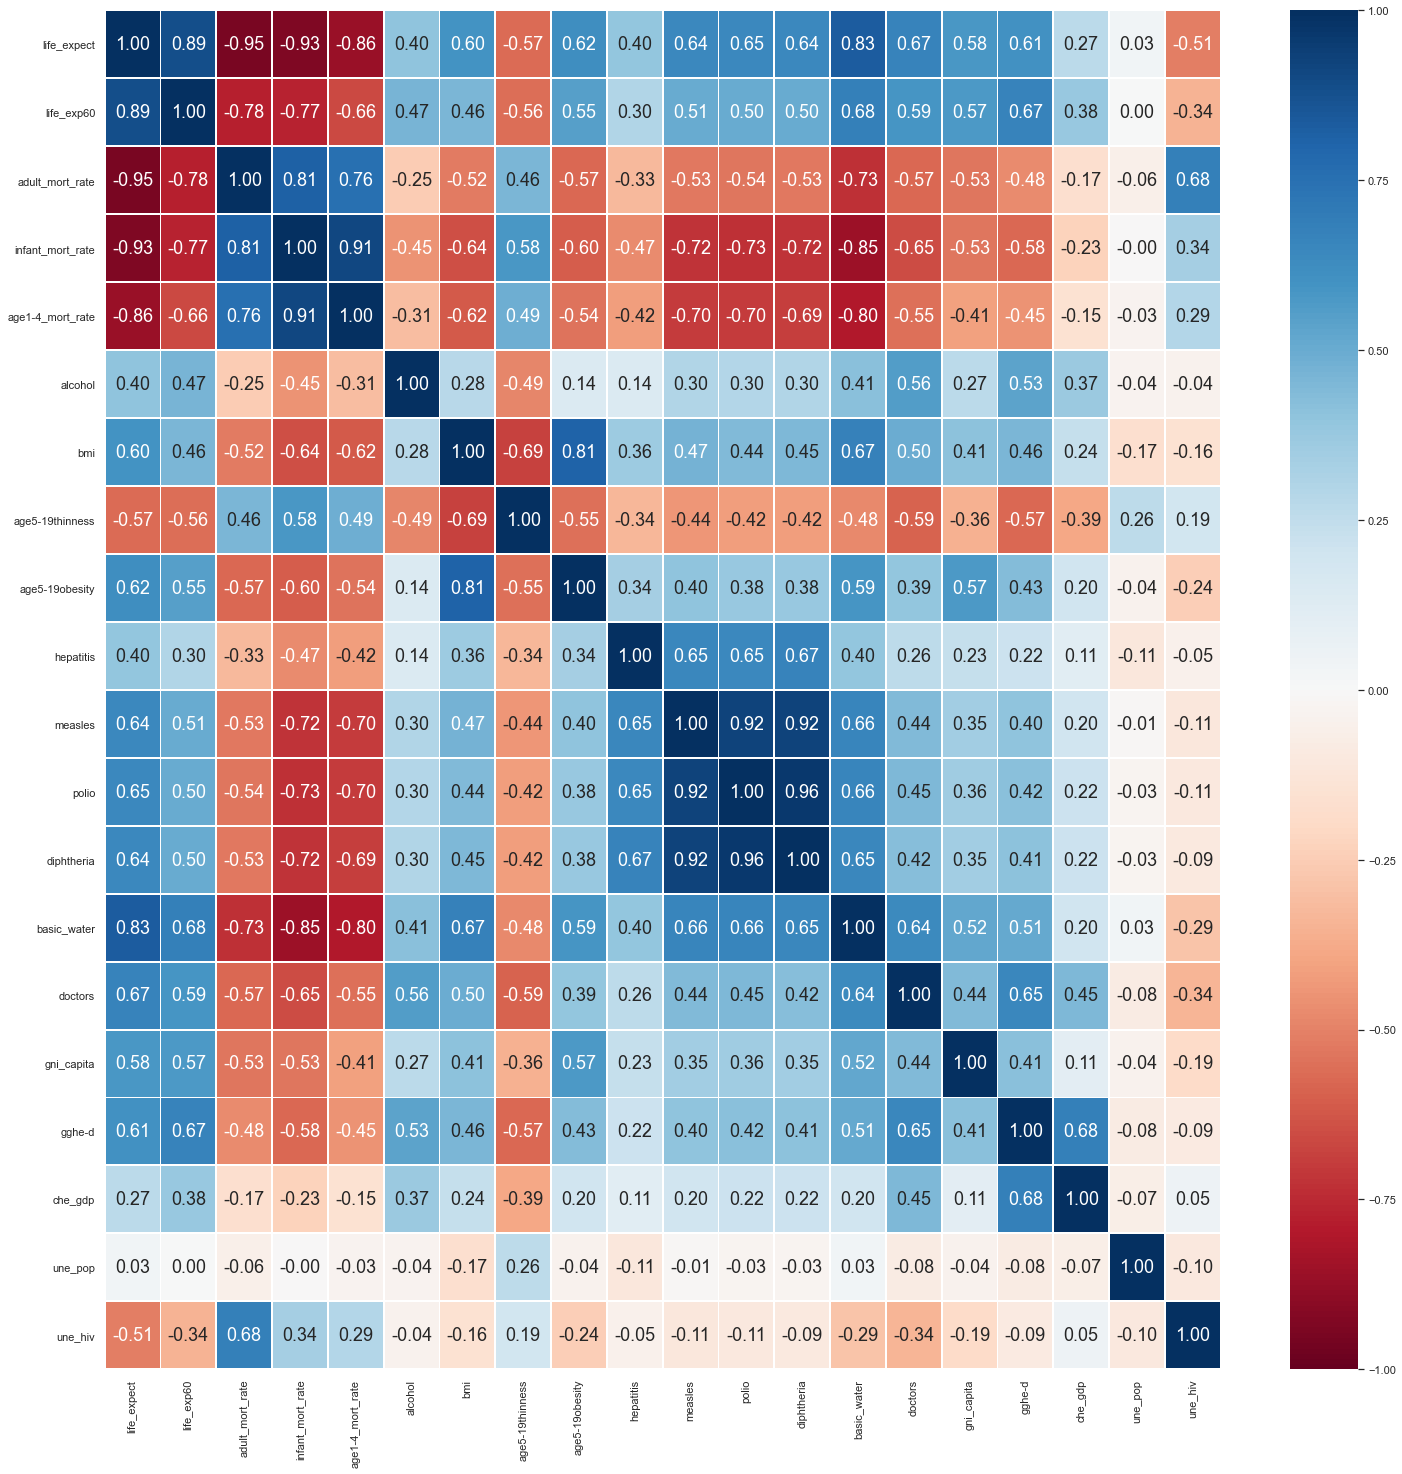

In [49]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(25, 25))
sb.heatmap(df_numeric.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Comparing features with life_expect

Compare 2 variables using jointplot in order to see which factor is the most significant

<ipython-input-50-c3c6f39c1391>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(20,10))


<Figure size 1440x720 with 0 Axes>

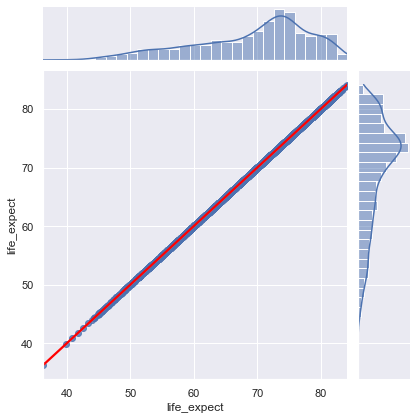

<Figure size 1440x720 with 0 Axes>

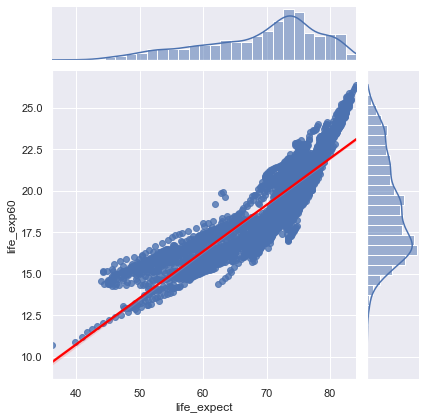

<Figure size 1440x720 with 0 Axes>

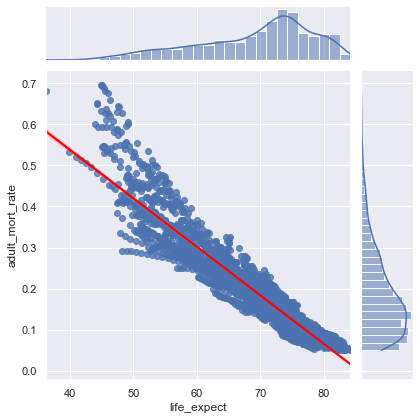

<Figure size 1440x720 with 0 Axes>

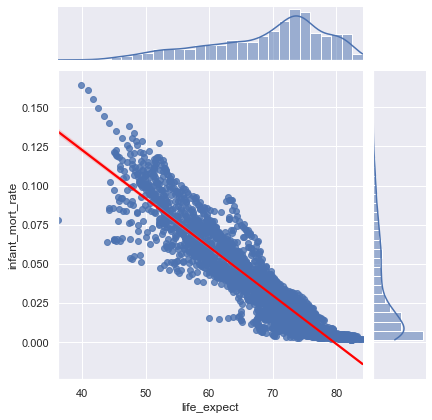

<Figure size 1440x720 with 0 Axes>

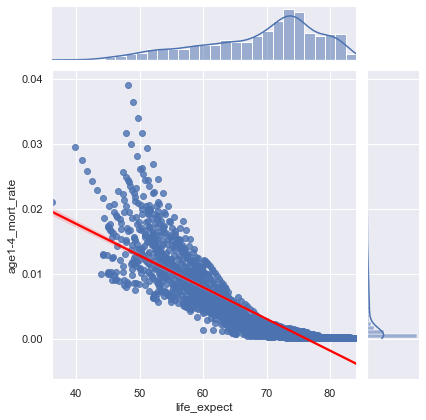

<Figure size 1440x720 with 0 Axes>

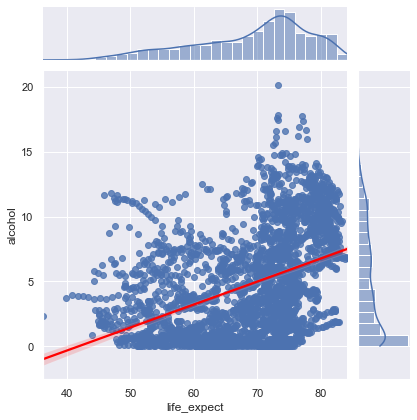

<Figure size 1440x720 with 0 Axes>

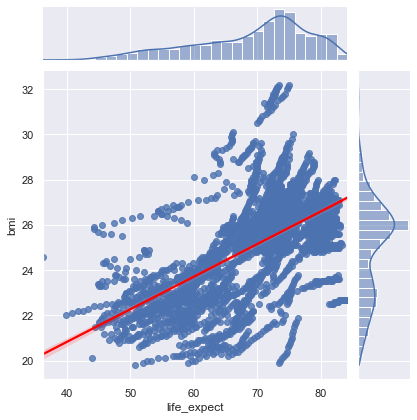

<Figure size 1440x720 with 0 Axes>

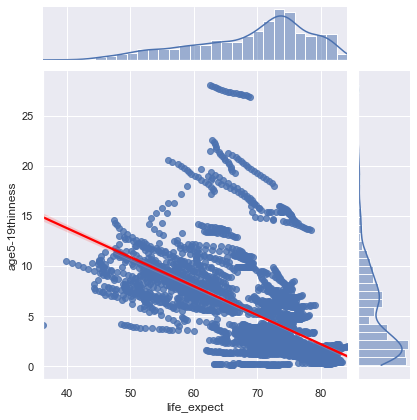

<Figure size 1440x720 with 0 Axes>

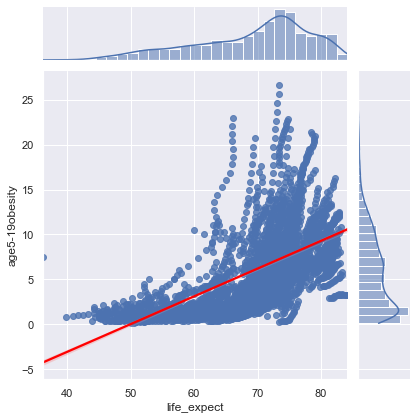

<Figure size 1440x720 with 0 Axes>

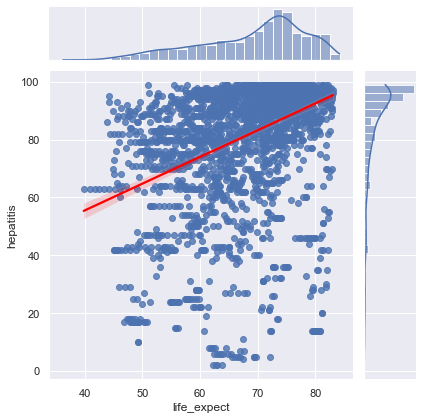

<Figure size 1440x720 with 0 Axes>

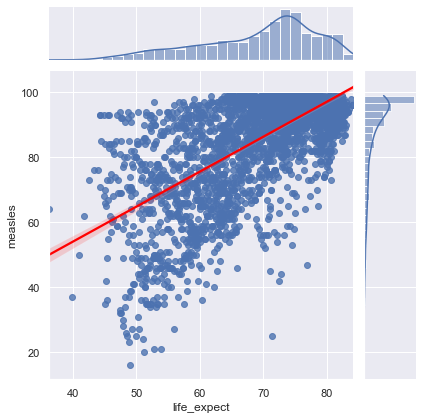

<Figure size 1440x720 with 0 Axes>

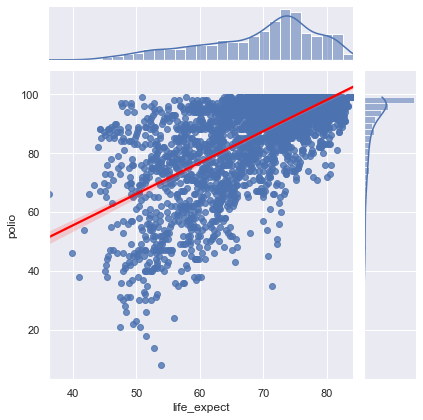

<Figure size 1440x720 with 0 Axes>

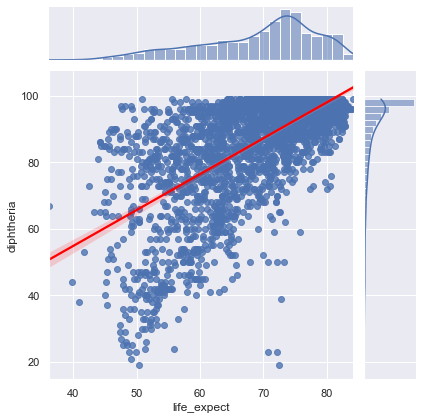

<Figure size 1440x720 with 0 Axes>

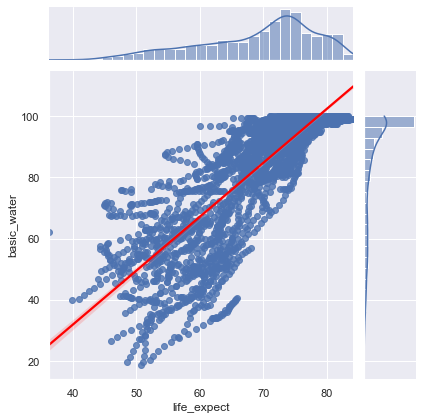

<Figure size 1440x720 with 0 Axes>

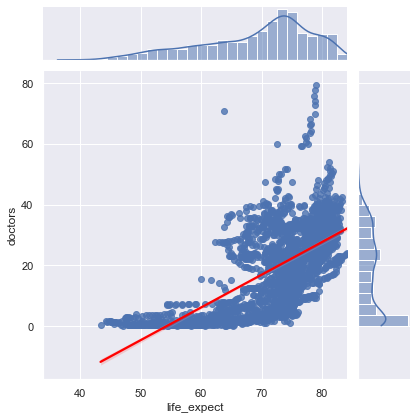

<Figure size 1440x720 with 0 Axes>

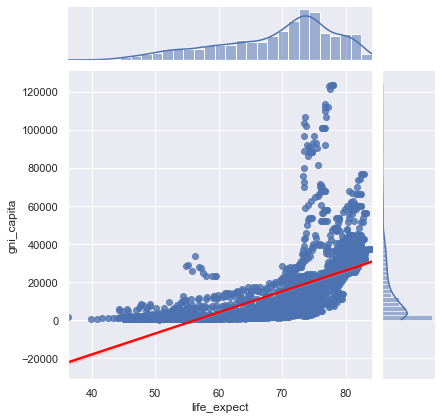

<Figure size 1440x720 with 0 Axes>

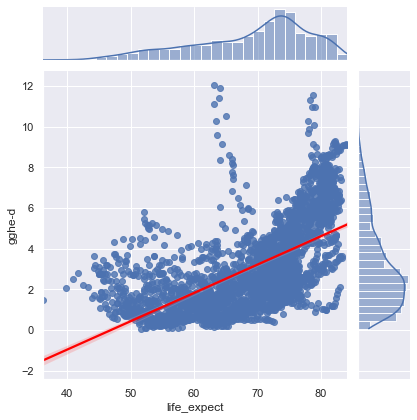

<Figure size 1440x720 with 0 Axes>

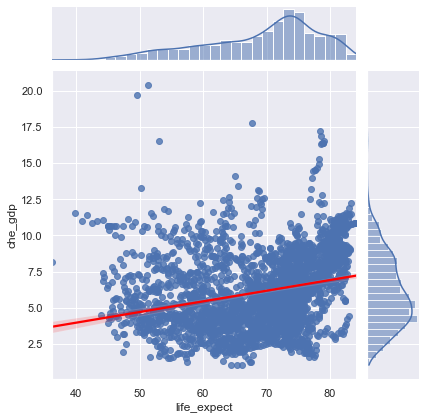

<Figure size 1440x720 with 0 Axes>

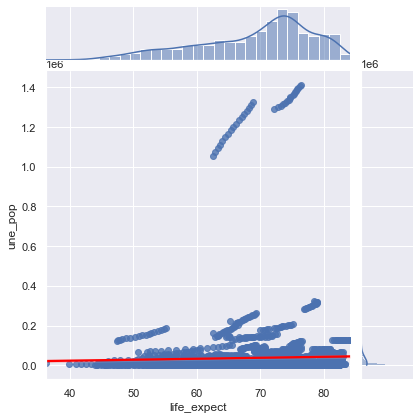

<Figure size 1440x720 with 0 Axes>

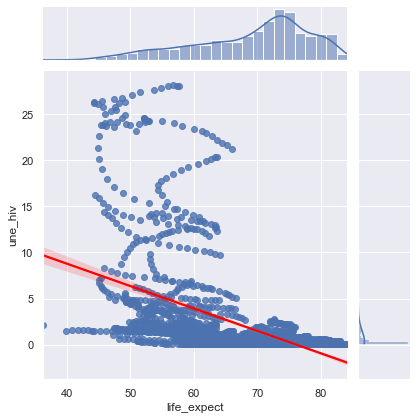

In [50]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=df_numeric, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

# Comparing features with life_exp60

<ipython-input-51-157e16ee9d83>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(20,10))


<Figure size 1440x720 with 0 Axes>

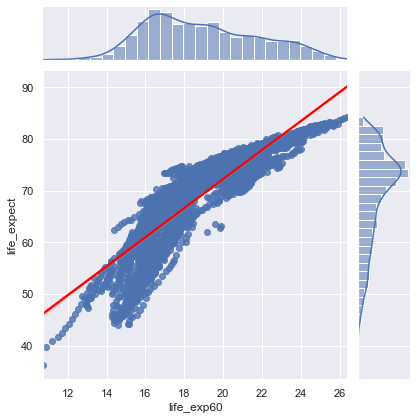

<Figure size 1440x720 with 0 Axes>

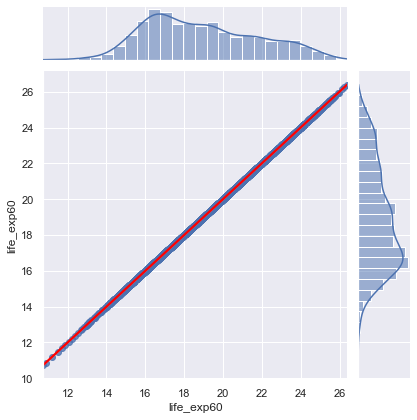

<Figure size 1440x720 with 0 Axes>

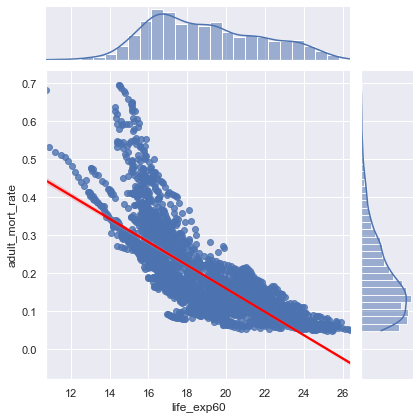

<Figure size 1440x720 with 0 Axes>

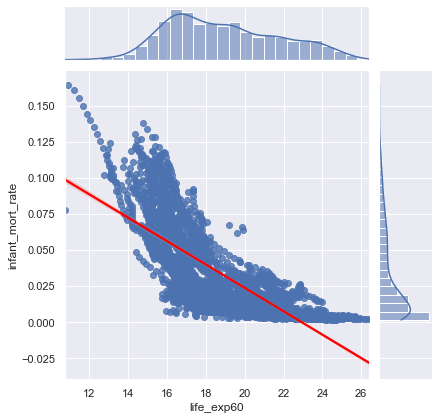

<Figure size 1440x720 with 0 Axes>

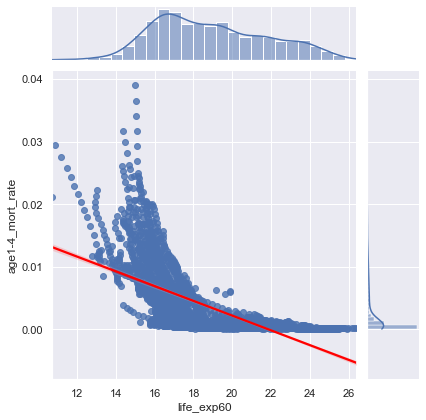

<Figure size 1440x720 with 0 Axes>

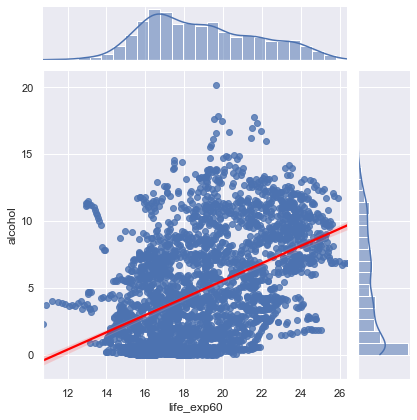

<Figure size 1440x720 with 0 Axes>

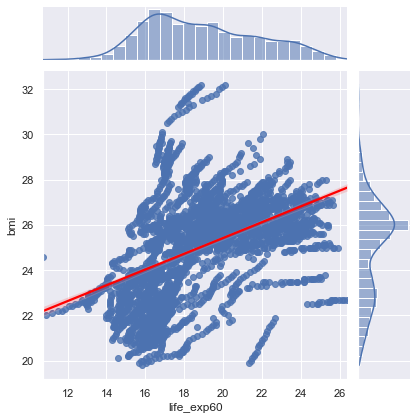

<Figure size 1440x720 with 0 Axes>

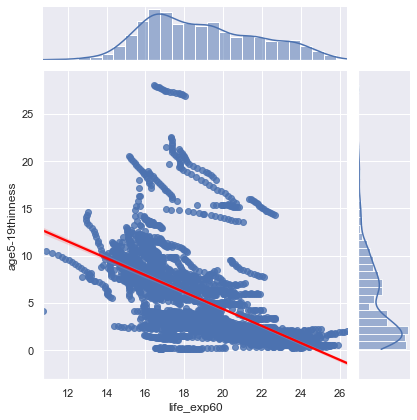

<Figure size 1440x720 with 0 Axes>

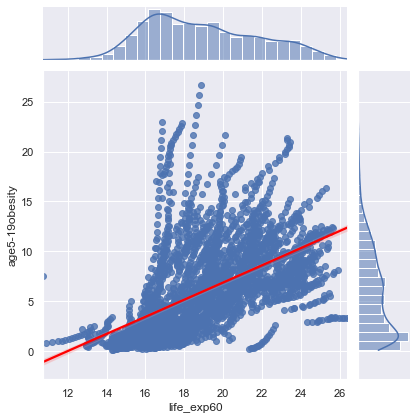

<Figure size 1440x720 with 0 Axes>

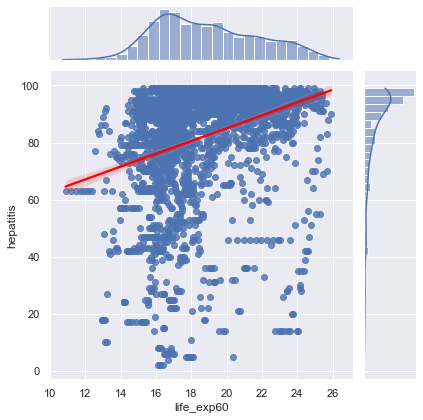

<Figure size 1440x720 with 0 Axes>

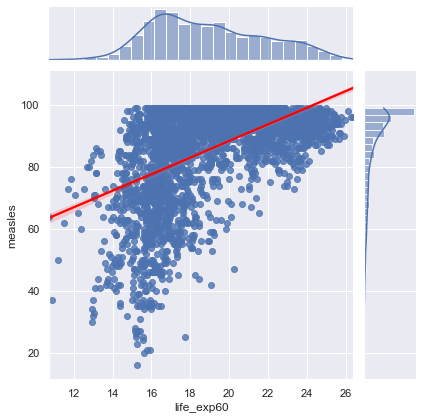

<Figure size 1440x720 with 0 Axes>

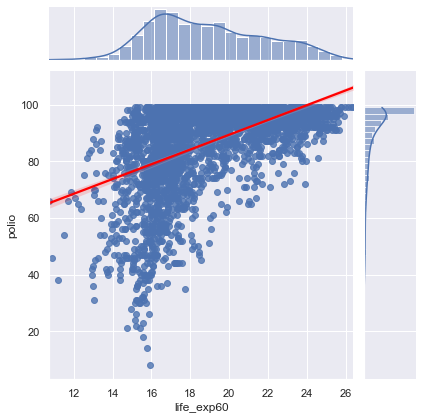

<Figure size 1440x720 with 0 Axes>

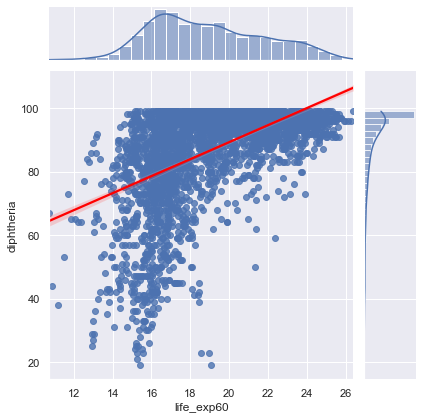

<Figure size 1440x720 with 0 Axes>

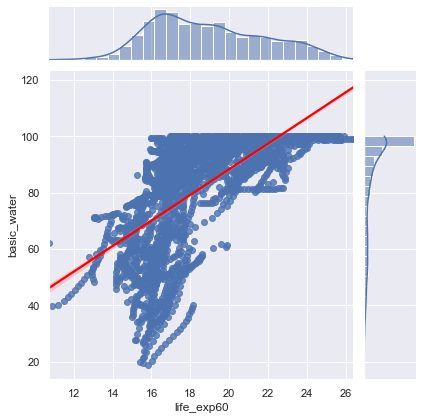

<Figure size 1440x720 with 0 Axes>

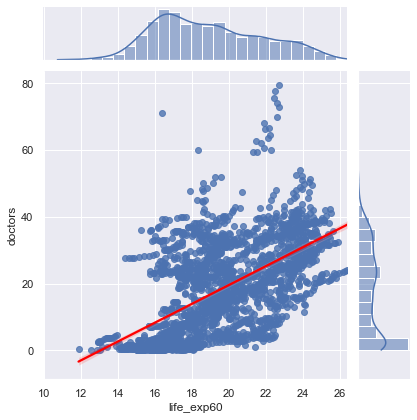

<Figure size 1440x720 with 0 Axes>

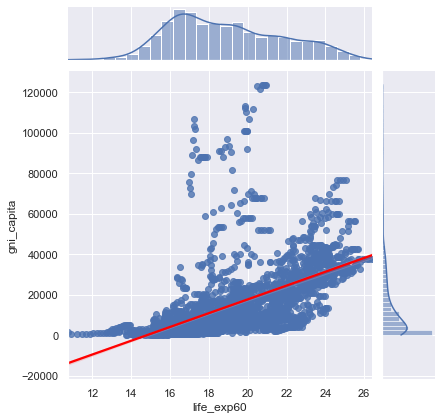

<Figure size 1440x720 with 0 Axes>

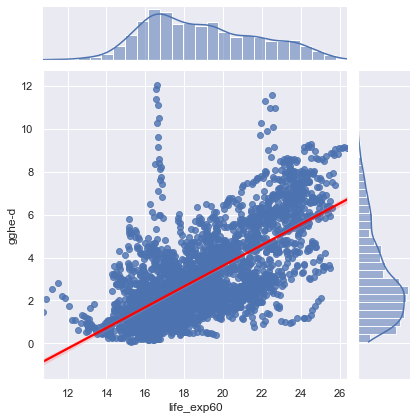

<Figure size 1440x720 with 0 Axes>

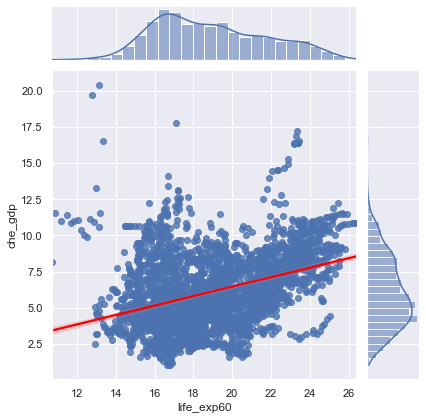

<Figure size 1440x720 with 0 Axes>

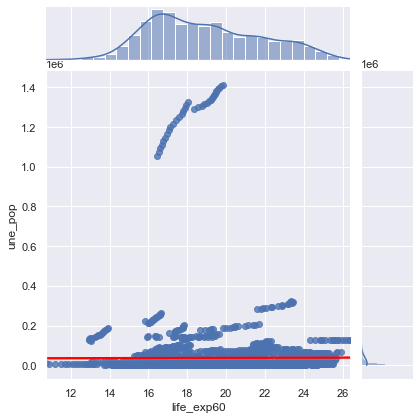

<Figure size 1440x720 with 0 Axes>

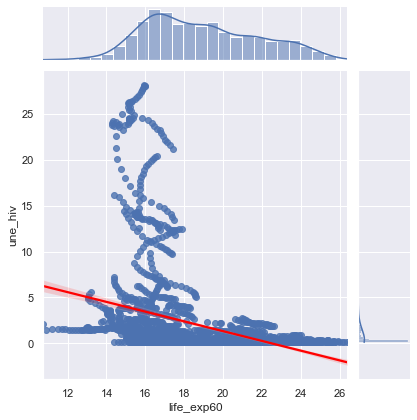

In [51]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=df_numeric, x="life_exp60", y=i, kind="reg",line_kws={"color": "red"})

## Statistics 
<a id='df_numeric_stats'></a>

In [52]:
df_numeric.describe()

life_expect   life_exp60  adult_mort_rate  infant_mort_rate  \
count  3111.000000  3111.000000      3111.000000       3111.000000   
mean     69.146384    18.912060         0.193528          0.032496   
std       9.129761     2.885412         0.114007          0.030361   
min      36.227360    10.728000         0.049202          0.001470   
25%      63.200095    16.619485         0.108270          0.008255   
50%      71.597200    18.508260         0.164822          0.019995   
75%      75.537030    21.099175         0.250832          0.051720   
max      84.166160    26.394020         0.696874          0.164515   

       age1-4_mort_rate      alcohol          bmi  age5-19thinness  \
count       3111.000000  3083.000000  3077.000000      3077.000000   
mean           0.003489     4.850654    25.052714         5.312447   
std            0.005146     4.002535     2.193445         4.652408   
min            0.000065     0.000000    19.800000         0.100000   
25%            0.000355     1.200510    23.300000         1.800000   
50%            0.000895     4.021600    25.500000         3.800000   
75%            0.004877     7.814025    26.500000         7.800000   
max            0.039095    20.182460    32.200000        28.100000   

       age5-19obesity    hepatitis      measles        polio   diphtheria  \
count     3077.000000  2881.000000  3100.000000  3100.000000  3100.000000   
mean         5.972278    82.141617    85.530000    86.584194    86.406129   
std          4.530812    20.565142    15.282203    14.975650    15.335294   
min          0.100000     2.000000    16.000000     8.000000    19.000000   
25%          2.000000    76.000000    79.000000    81.000000    82.000000   
50%          5.200000    91.000000    92.000000    93.000000    93.000000   
75%          8.900000    96.000000    96.000000    97.000000    97.000000   
max         26.700000    99.000000    99.000000    99.000000    99.000000   

       basic_water      doctors     gni_capita       gghe-d      che_gdp  \
count  3100.000000  2216.000000    3004.000000  3043.000000  3026.000000   
mean     83.390295    18.021928   14329.687084     3.116490     6.119615   
std      19.238249    13.906474   17262.440711     2.086198     2.514591   
min      18.695210     0.128000     250.000000     0.062360     1.025160   
25%      71.832917     4.346875    2690.000000     1.532075     4.234580   
50%      92.203705    17.674500    8027.000000     2.601750     5.764255   
75%      98.552870    28.570250   19655.000000     4.269990     7.880403   
max     100.000010    79.541000  123860.000000    12.062730    20.413410   

            une_pop      une_hiv  
count  3.080000e+03  2380.000000  
mean   3.722953e+04     2.031513  
std    1.377832e+05     4.585364  
min    7.601600e+01     0.100000  
25%    2.197585e+03     0.100000  
50%    8.568698e+03     0.400000  
75%    2.517140e+04     1.500000  
max    1.414049e+06    28.200000

# Insights from EDA (global)

## Alcohol and LE

<Figure size 1440x720 with 0 Axes>

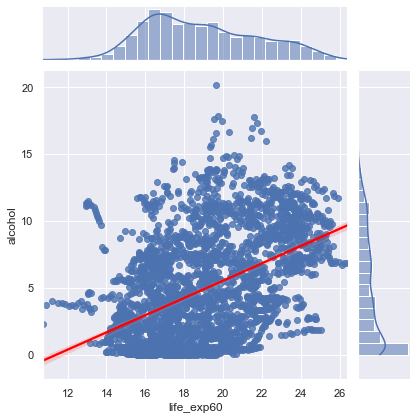

In [53]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_exp60", y="alcohol", kind="reg",line_kws={"color": "red"})

From the jointplot, we can see the alcohol has a positive relation with life expectancy at birth and life expectancy at age 60. Alcohol has a 0.40 correlation with life expectancy at birth and has a 0.47 correlation with life expectancy at age 60. Since correlation with life_exp60 is higher, we will use life_exp60 as a comparison.

This is different from our assumption as we assumed that alcohol would have a negative relationship with life expectancy. Upon further research, we realised that alcohol in moderation can have beneficial health effects and may lead to longetivity. (https://time.com/5166514/moderate-drinking-live-longer-study/)

Furthermore, from the distibution of alcohol we can see that the median is around 4.02 liters per capita and the median of life_exp60 is around 18.5 years. The median of alcohol and life_exp60 is close to their mean. The mean of alcohol consumption is 4.85 liters per capita and the mean of life_exp60 is 18.91. Hence, on average, individuals in countries have a low to moderate alcohol consumption. This coincides with the positive relationship between alcohol and life expectancy when alcohol is consumed in moderation.


## Obesity and LE

Another area of interest is the obesity rate from ages 5-19 and thiness from ages 5-19. Thinness and obesity have a slightly higher correlation with life expectancy (-0.57 and 0.62 respectively) than with life expectancy at 60 (-0.56 and 0.55 respectively). However, the correlations are very close to each other so we will just be using life_expect as a comparison.

<Figure size 1440x720 with 0 Axes>

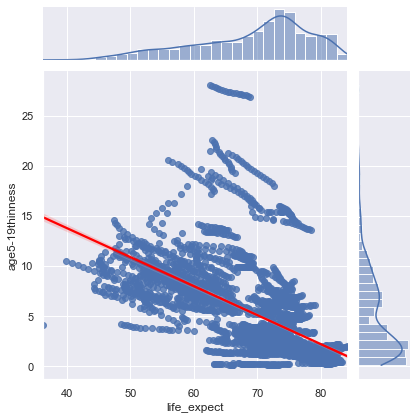

In [54]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="age5-19thinness", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

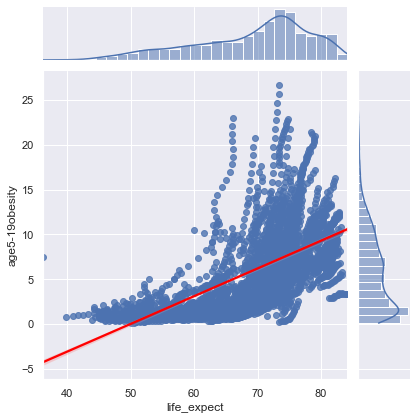

In [55]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="age5-19obesity", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

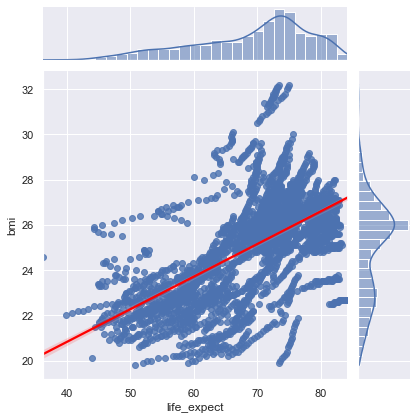

In [56]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="bmi", kind="reg",line_kws={"color": "red"})

Thinness has a negative relationship with life expectancy which matches our assumption. However the relationship between age5-19obesity contradicted our assumptions that it would also have a negative relationship. Instead, age5-19 obesity seems to be increasing with life expectancy.

Upon further inspection, we realised that the mean of bmi is only around 25.05 and since age5-19obesity is measured by the percentage of population with bmi>mean +2s.d, it means that bmi>30 is considered obese. The mean percentage of population with bmi > 30 is around 5.97% (see [Statistics](#df_numeric_stats)). This also considers people who are obese and not only those who are severely obese. Hence, age5-19obesity may not be affecting the life-expectancy of the population as much. 

Research also says that being underweight is deadlier than being overweight which could contribute to the differences between 'Thinness' and 'Obesity' in their relationship with life expectancy. Those who have bmi < 18.5 are 1.8 times more likely to be at risk of dying compared to a person with average bmi and those who have bmi >30 are only 1.2 more likely to be at risk of die compared to an average person. 

Furthermore, BMI does not only indicate body fat but also muscle mass. A person with a higher bmi may also have a higher muscle mass which could contribute to the increase in life expectancy. (https://www.webmd.com/diet/news/20140328/underweight-even-deadlier-than-overweight-study-says#:~:text=People%20who%20are%20clinically%20underweight,more%20than%2050%20prior%20studies.)


# Top predictors for life expectancy and life expectancy at 60

From the heatmap some areas of interest are adult mortality rate, infant mortality rate and age1-4 mortality rate as they have the strongest negative correlation with life expectancy (-0.95,-0.93,-0.86 respectively). They also have the strongest correlation rate with life expectancy at 60 which is -0.78 with adult mortality rate, -0.77 with infant mortality rate and -0.66 with child(ages 1-4) mortality rate. (see [Heatmap](#df_numeric_heatmap))

In [57]:
adult_mort_rate = pd.DataFrame(df_numeric['adult_mort_rate'])
#adult_mort_rate 

In [58]:
infant_mort_rate = pd.DataFrame(df_numeric['infant_mort_rate'])
#infant_mort_rate

In [59]:
child_mort_rate = pd.DataFrame(df_numeric['age1-4_mort_rate'])
#child_mort_rate

In [60]:
life_expect = pd.DataFrame(df_numeric['life_expect'])
#life_expect

In [61]:
life_exp60 = pd.DataFrame(df_numeric['life_exp60'])
#life_exp60

In [62]:
basic_water = pd.DataFrame(df_numeric['basic_water'])

In [63]:
mort_rate = pd.concat([life_expect,adult_mort_rate,infant_mort_rate,child_mort_rate],axis=1).reindex(life_expect.index)


In [64]:
measles =pd.DataFrame(df_numeric['measles'])

In [65]:
polio = pd.DataFrame(df_numeric['polio'])

In [66]:
diptheria = pd.DataFrame(df_numeric['diphtheria'])

In [67]:
mort_rate1 = pd.concat([life_expect,infant_mort_rate,child_mort_rate,measles,polio,diptheria],axis=1).reindex(life_expect.index)


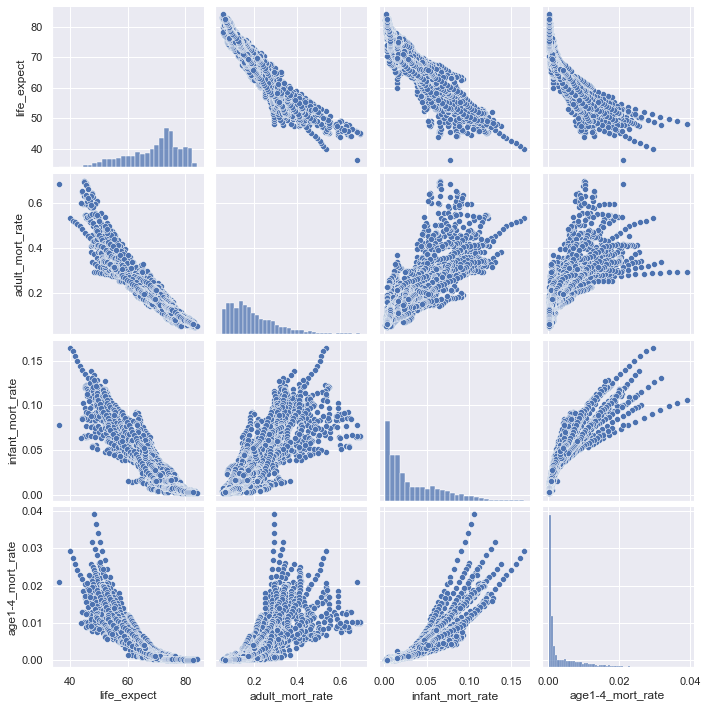

In [68]:
sb.pairplot(data = mort_rate)

In [69]:
mort_rate60 = pd.concat([life_exp60,adult_mort_rate,infant_mort_rate,child_mort_rate],axis=1).reindex(life_exp60.index)
mort_rate60

life_exp60  adult_mort_rate  infant_mort_rate  age1-4_mort_rate
0       14.73400         0.383558          0.137985          0.025695
1       14.95963         0.372388          0.133675          0.024500
2       15.20010         0.354515          0.128320          0.023260
3       15.39144         0.343217          0.122040          0.021925
4       15.56860         0.333871          0.115700          0.020545
...          ...              ...               ...               ...
3106    16.57977         0.209267          0.055840          0.004845
3107    16.64219         0.205146          0.055350          0.004600
3108    16.70787         0.200820          0.054585          0.004405
3109    16.77074         0.196661          0.053465          0.004160
3110    16.83024         0.192794          0.051895          0.003990

[3111 rows x 4 columns]

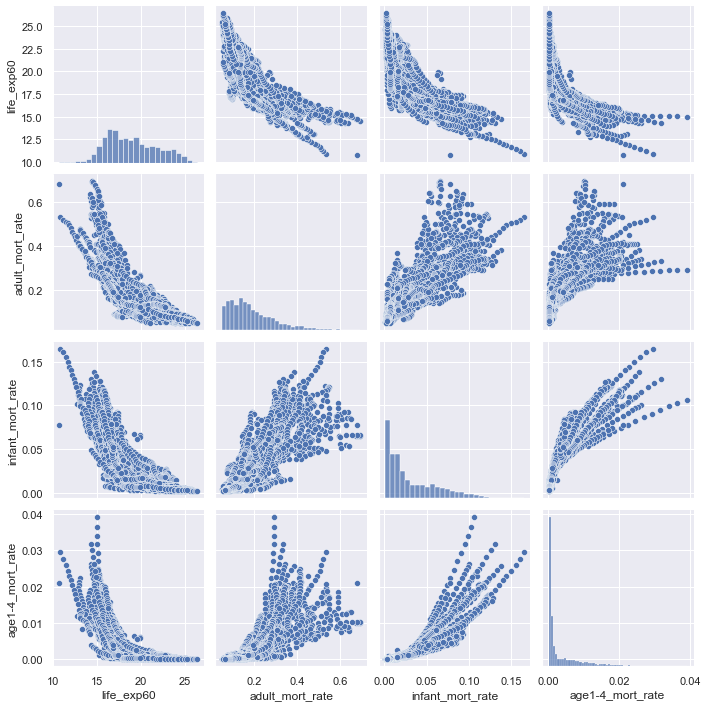

In [70]:
sb.pairplot(data = mort_rate60)

There is a linear relationship between mortality rates and life expectancy as well as between mortality rates and life expectancy at 60. Since the pair plot results of both life expectancy and life expectancy at 60 is similar, we will just be using life expectancy as a comparison. 

As life expectancy increases, the mortality rates of adult, infant, and child from ages 1 to 4 all decrease as well. From the pairplot we can see that the relationship between adult mortality and life expectancy is the strongest followed by infant mortality rate and then mortality rates from ages 1-4. 

We can explore what factors are significant in affecting mortality rate across age groups and if it is the same across all age groups. 

From the heatmap above we can see a relatively high correlation between the mortality rates and other factors as well. (see [Heatmap](#df_numeric_heatmap))

For adult mortality, it has strong correlation with infant mortality,child mortality and basic water at -0.81,-0.76 and -0.73 respectively.

For infant mortality, it has strong correlation between child mortality, adult mortality and basic water as well at -0.91,-0.81 and -0.85 respectively. Infant mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.73,-0.72 and -0.72 respectively.

For child mortality(ages 1-4), it has strong correlation between infant mortality, adult mortality and basic water as well at -0.91,-0.76 and -0.80 respectively.Child mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.70,-0.70 and -0.69 respectively.

Note that children under 5 are at high risk for polio, measles and diptheria and hence being vaccinated against these diseases would contribute towards the strong linear relationship between age(1-4) mortality rate and life expectancy as well as infant mortality rate and life expectancy.



### Relationship between mortality rates and vaccinations

<AxesSubplot:>

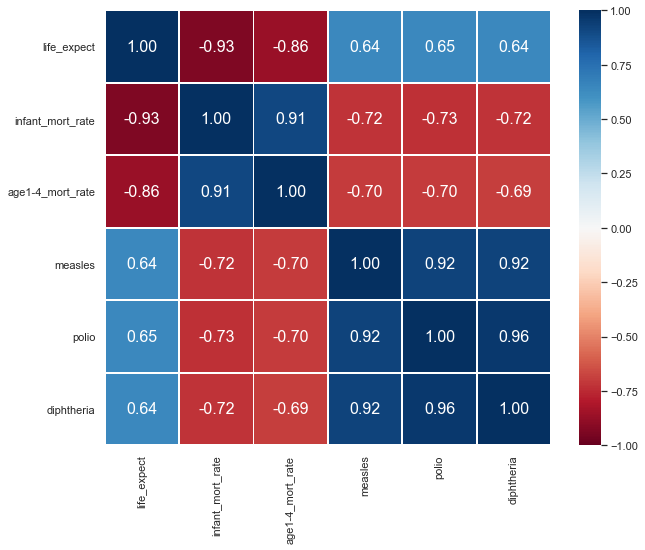

In [71]:
f = plt.figure(figsize=(10, 8))
sb.heatmap(mort_rate1.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 16}, cmap = "RdBu")

### Relationship between mortality rates and basic water

<Figure size 1440x720 with 0 Axes>

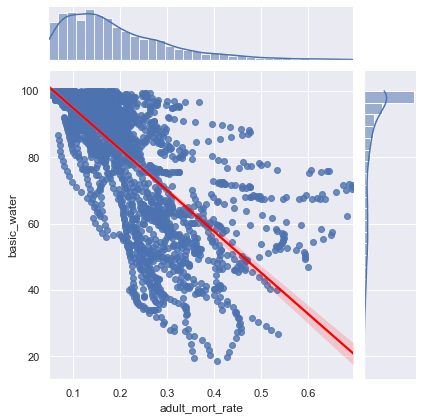

In [72]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="adult_mort_rate", y="basic_water", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

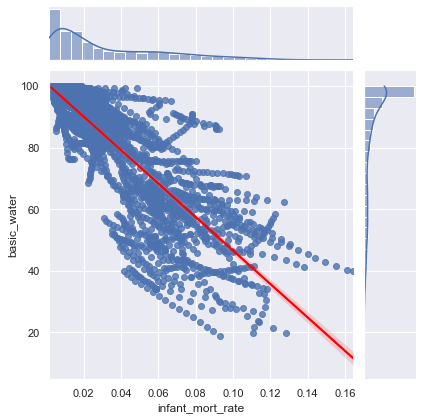

In [73]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="infant_mort_rate", y="basic_water", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

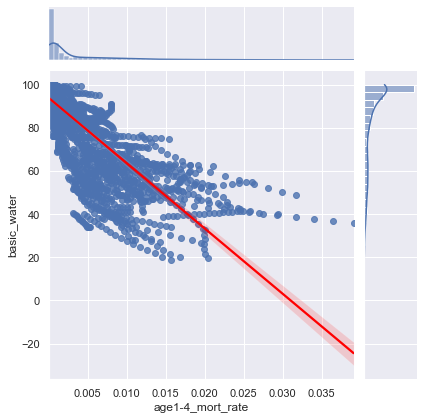

In [74]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="age1-4_mort_rate", y="basic_water", kind="reg",line_kws={"color": "red"})

From the scatter plots above we can see that the adult, infant and child (1-4) mortality rates is related to the percentage of the population having access to basic water services. The mortality rates have a negative, linear relationship with basic_water. The median for basic water is about 92% and the median for the adult, infant and child mortality are all relatively low at around 0 to 0.2. 

This could be the reason why basic water also has a strong correlation with life expectancy (0.83) and life expectancy at 60 (0.68).


### Significant features

Hence, from the analysis the top 4 significant features that affect life expectancy and life expectancy at 60 are adult_mort_rate, infant_mort_rate, age1-4_mort_rate and basic_water.

### Difference between life_expect and life_exp60

The correlation of most of the features with life_expect is higher than with life_exp60 but the correlation values are close to each other. The 2 features that have higher correlation with life_exp60 than life_exp is gghe and che_gdp. life_exp60 has correlation of 0.67 and 0.38 with gghe and che_gdp respectively which is higher than 0.61 and 0.27 with life_exp (see [Heatmap](#df_numeric_heatmap)). This could be attributed to the medical subsidies and services provided by the government for people at 60 years of age and beyond. 

In the machine learning models we will be trying to find the equation to predict life expectancy and life expectancy at 60 and the weight of each feature.

# Machine Learning (Global)
1) Multi-variate Regression

2) RandomForestRegressor

3) GradientBoostingRegressor

## Preparing and standardising train and test datasets for machine learning

In [75]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

df_cat = df[['region']]
ohe.fit(df_cat)
df_cat_ohe = pd.DataFrame(ohe.transform(df_cat).toarray(), columns=ohe.get_feature_names(df_cat.columns))

df_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region_Africa                 3111 non-null   float64
 1   region_Americas               3111 non-null   float64
 2   region_Eastern Mediterranean  3111 non-null   float64
 3   region_Europe                 3111 non-null   float64
 4   region_South-East Asia        3111 non-null   float64
 5   region_Western Pacific        3111 non-null   float64
dtypes: float64(6)
memory usage: 146.0 KB


In [76]:
ml_df = pd.DataFrame(df.drop([ 'year', 'country', 'region'], axis=1))
ml_df_nc = pd.concat([ml_df, df_cat_ohe], sort=False, axis=1).reindex(index=df_cat_ohe.index)

#dropping the whole row if any null - ensure same number of data for each predictor
clean_ml_df = ml_df_nc.dropna()
clean_ml_df

life_expect  life_exp60  adult_mort_rate  infant_mort_rate  \
4        51.52863    15.56860         0.333871          0.115700   
9        57.29004    16.48146         0.281049          0.084800   
17       51.43743    15.71862         0.369974          0.103510   
18       52.03133    15.77446         0.365476          0.100855   
19       52.27760    15.80661         0.369024          0.097855   
...           ...         ...              ...               ...   
3106     64.49448    16.57977         0.209267          0.055840   
3107     64.79716    16.64219         0.205146          0.055350   
3108     65.10757    16.70787         0.200820          0.054585   
3109     65.45008    16.77074         0.196661          0.053465   
3110     65.79089    16.83024         0.192794          0.051895   

      age1-4_mort_rate  alcohol   bmi  age5-19thinness  age5-19obesity  \
4             0.020545  2.41274  22.2             10.3             0.8   
9             0.013310  6.11778  22.7              9.4             1.3   
17            0.017145  7.17131  20.6              9.1             0.3   
18            0.016470  6.62197  20.7              8.9             0.4   
19            0.015735  6.51436  20.8              8.8             0.4   
...                ...      ...   ...              ...             ...   
3106          0.004845  6.29833  22.4              9.2             3.1   
3107          0.004600  6.42186  22.6              9.1             3.5   
3108          0.004405  6.64447  22.7              9.0             3.8   
3109          0.004160  6.83826  22.8              8.9             4.2   
3110          0.003990  7.11148  22.9              8.9             4.7   

      hepatitis  ...   gghe-d  che_gdp    une_pop  une_hiv  region_Africa  \
4          43.0  ...  1.68663  3.96720  18758.145      1.3            1.0   
9          47.0  ...  2.60046  3.84261  22514.281      1.7            1.0   
17         83.0  ...  1.46507  6.17697   6378.871      3.3            1.0   
18         83.0  ...  1.69244  6.40484   6525.545      3.1            1.0   
19         83.0  ...  1.53550  6.47216   6704.113      2.8            1.0   
...         ...  ...      ...      ...        ...      ...            ...   
3106       79.0  ...  0.43670  2.07638   6444.530      0.3            0.0   
3107       87.0  ...  0.71266  2.39985   6541.304      0.3            0.0   
3108       88.0  ...  0.68373  2.29846   6639.756      0.3            0.0   
3109       81.0  ...  0.86391  2.45366   6741.164      0.3            0.0   
3110       66.0  ...  0.76495  2.36087   6845.846      0.3            0.0   

      region_Americas  region_Eastern Mediterranean  region_Europe  \
4                 0.0                           0.0            0.0   
9                 0.0                           0.0            0.0   
17                0.0                           0.0            0.0   
18                0.0                           0.0            0.0   
19                0.0                           0.0            0.0   
...               ...                           ...            ...   
3106              0.0                           0.0            0.0   
3107              0.0                           0.0            0.0   
3108              0.0                           0.0            0.0   
3109              0.0                           0.0            0.0   
3110              0.0                           0.0            0.0   

      region_South-East Asia  region_Western Pacific  
4                        0.0                     0.0  
9                        0.0                     0.0  
17                       0.0                     0.0  
18                       0.0                     0.0  
19                       0.0                     0.0  
...                      ...                     ...  
3106                     0.0                     1.0  
3107                     0.0                     1.0  
3108                     0.0           

Insights:
Will take life_expect and life_exp60 as response variables for machine learning and compare to see if there is any difference

Obvious that life_exp60 will be most highly correlated with life_expect with correlation coefficient of 0.89. This is because both of them have similar derivations.

Thus, we will take life expectancy and life expectancy at 60 as response variables to test individually

In [77]:
#creating Train and Test datasets for Regression
from sklearn.model_selection import train_test_split

y_le = pd.DataFrame(clean_ml_df['life_expect'])
y_le60 = pd.DataFrame(clean_ml_df['life_exp60'])
X = pd.DataFrame(clean_ml_df.drop(['life_expect', 'life_exp60'], axis=1))

#ensuring same splits for comparison after machine learning
X_train, X_test, y_train_le, y_test_le = train_test_split(X, y_le, test_size = 0.25, random_state = 42)
X_train, X_test, y_train_le60, y_test_le60 = train_test_split(X, y_le60, test_size = 0.25, random_state = 42)

print("Train Set for y=life_expect:", y_train_le.shape, X_train.shape)
print("Test Set for y=life_expect:", y_test_le.shape, X_test.shape)
print()
print("Train Set for y=life_exp60:", y_train_le60.shape, X_train.shape)
print("Test Set for y=life_exp60:", y_test_le60.shape, X_test.shape)

Train Set for y=life_expect: (1091, 1) (1091, 24)
Test Set for y=life_expect: (364, 1) (364, 24)

Train Set for y=life_exp60: (1091, 1) (1091, 24)
Test Set for y=life_exp60: (364, 1) (364, 24)


## Model 1: Multi-Variate Regression


### Analysing response = life_expect dataset

In [78]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train_le) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)



Intercept of Regression: b =  [86.65297843]



Predictors  Coefficients
2               age1-4_mort_rate   -253.646492
1               infant_mort_rate    -72.290380
0                adult_mort_rate    -46.641377
19               region_Americas      0.875379
18                 region_Africa     -0.843383
20  region_Eastern Mediterranean     -0.824731
22        region_South-East Asia      0.719415
14                        gghe-d      0.298362
4                            bmi     -0.295682
23        region_Western Pacific      0.154104
17                       une_hiv      0.117801
15                       che_gdp      0.087632
21                 region_Europe     -0.080785
6                 age5-19obesity      0.068946
5                age5-19thinness     -0.045063
3                        alcohol      0.028628
11                   basic_water      0.018887
10                    diphtheria     -0.016148
9                          polio     -0.005147
12                       doctors      0.003797
8                        measles      0.003395
7                      hepatitis      0.000628
13                    gni_capita      0.000018
16                       une_pop     -0.000001

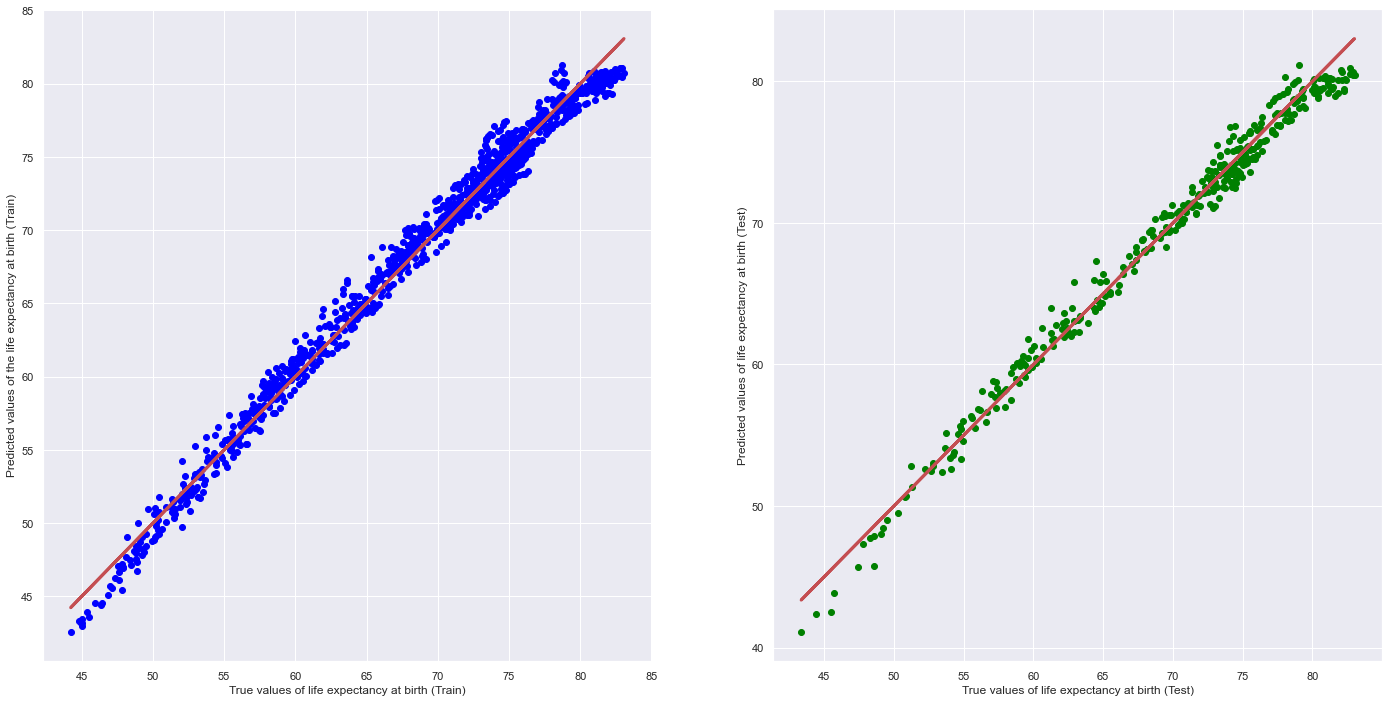

In [79]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of the life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()



In [80]:
from sklearn.metrics import mean_squared_error

print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9866374731413976
Mean Squared Error (MSE) 	: 1.140802057178235

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9862216843371314
Mean Squared Error (MSE) 	: 1.1603515864158909



### Analysing response = life_exp60 dataset

In [81]:
linreg = LinearRegression()
linreg.fit(X_train, y_train_le60) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)

Intercept of Regression: b =  [32.81367257]



Predictors  Coefficients
0                adult_mort_rate    -16.976822
2               age1-4_mort_rate    -16.885882
1               infant_mort_rate     -9.550940
19               region_Americas      1.297873
20  region_Eastern Mediterranean     -0.968500
22        region_South-East Asia      0.869072
18                 region_Africa     -0.643091
4                            bmi     -0.459512
21                 region_Europe     -0.350889
14                        gghe-d      0.320448
23        region_Western Pacific     -0.204466
17                       une_hiv      0.168206
15                       che_gdp      0.093201
6                 age5-19obesity      0.082911
5                age5-19thinness     -0.069354
3                        alcohol      0.021568
9                          polio     -0.012998
11                   basic_water      0.010900
10                    diphtheria     -0.008951
12                       doctors     -0.008382
8                        measles      0.002653
7                      hepatitis      0.000362
13                    gni_capita      0.000018
16                       une_pop     -0.000002

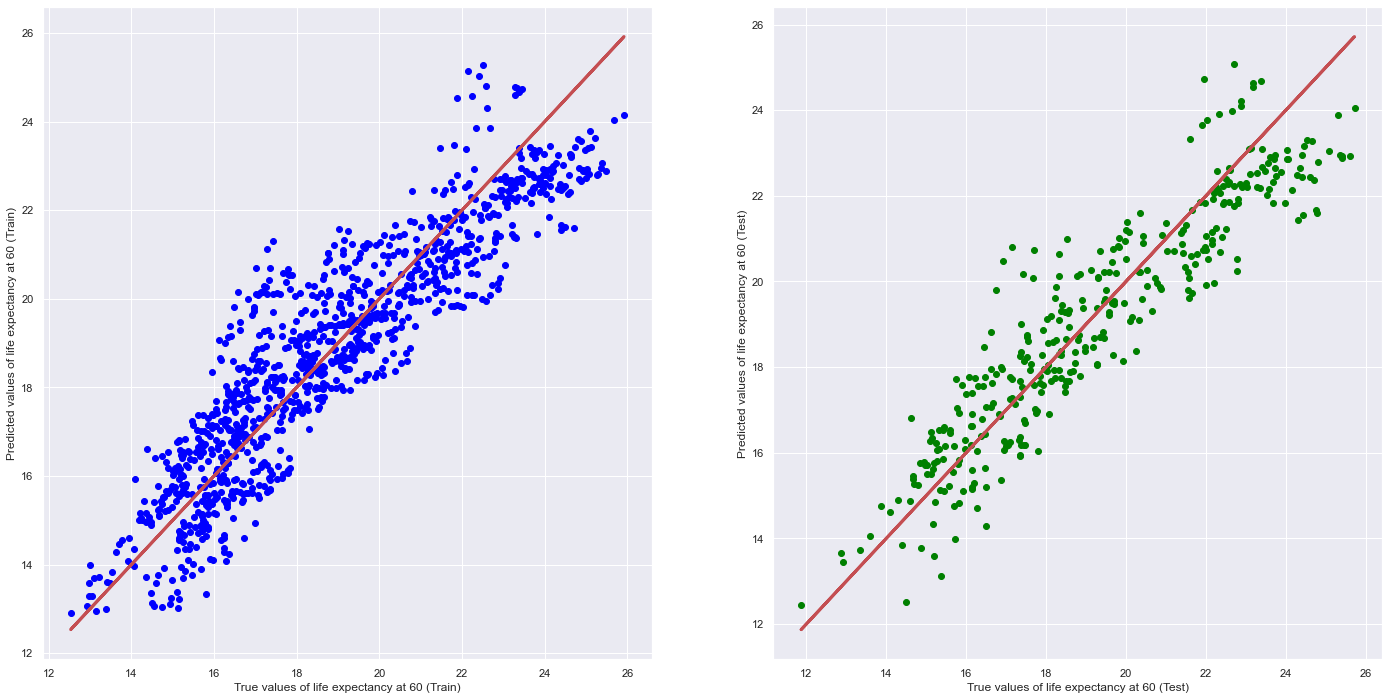

----------For Response = life_exp60----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8249821629018471
Mean Squared Error (MSE) 	: 1.4823846611369116

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8488650611301705
Mean Squared Error (MSE) 	: 1.4126724369277228



In [82]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()


print("----------For Response = life_exp60----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

### Analysing with only top 3 predictors

In [83]:
y = pd.DataFrame(clean_ml_df['life_expect'])
X = pd.DataFrame(clean_ml_df[['age1-4_mort_rate','adult_mort_rate','infant_mort_rate']])

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.25, random_state=0)

print("Train Set :", y_train_3.shape, X_train_3.shape)
print("Test Set  :", y_test_3.shape, X_test_3.shape)

linreg = LinearRegression()  
linreg.fit(X_train_3, y_train_3) 

print()
print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key=abs)

Train Set : (1091, 1) (1091, 3)
Test Set  : (364, 1) (364, 3)

Intercept of Regression: b =  [82.23140887]



Predictors  Coefficients
0   adult_mort_rate   -181.162589
2  age1-4_mort_rate   -121.999678
1  infant_mort_rate    -43.901281

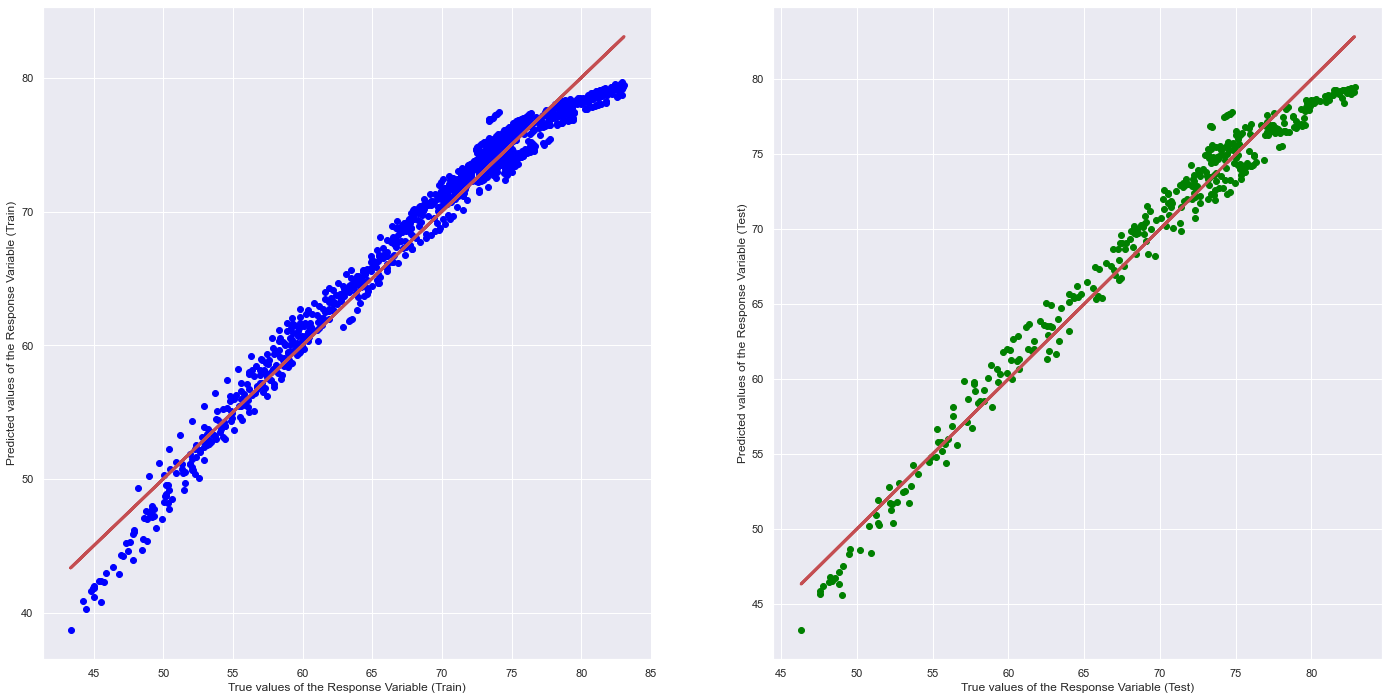

In [84]:
y_train_pred = linreg.predict(X_train_3)
y_test_pred = linreg.predict(X_test_3)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_3, y_train_pred, color = "blue")
axes[0].plot(y_train_3, y_train_3, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_3, y_test_pred, color = "green")
axes[1].plot(y_test_3, y_test_3, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [85]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train_3, y_train_3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_3, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test_3, y_test_3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_3, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.973450536187826
Mean Squared Error (MSE) 	: 2.274570334944881

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9709165566671669
Mean Squared Error (MSE) 	: 2.4321901441188696



The high explaianed variance and low mean squared error indicates that the prediction from using only these 3 mortality predictors is sufficiently accurate. Hence, in the case where there is not enough information for the remaining predictors, we can tap on only these 3 predictors to make a prediction if necessary.
This would also remove less relevant predictors which would increase the speed of our model and reduce possibility of overfitting.

## Model 2: RandomForestRegressor

### Analysing response = life_expect dataset

In [86]:
print("Train Set for y=life_expect:", y_train_le.shape, X_train.shape)
print("Test Set for y=life_expect:", y_test_le.shape, X_test.shape)
print()
print("Train Set for y=life_exp60:", y_train_le60.shape, X_train.shape)
print("Test Set for y=life_exp60:", y_test_le60.shape, X_test.shape)

Train Set for y=life_expect: (1091, 1) (1091, 24)
Test Set for y=life_expect: (364, 1) (364, 24)

Train Set for y=life_exp60: (1091, 1) (1091, 24)
Test Set for y=life_exp60: (364, 1) (364, 24)


In [87]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  
              'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

RandomForestRegressor(max_depth=10, n_estimators=700, random_state=0)
0.9944183623887414


In [88]:
#using best hyperparameter

rfr = RandomForestRegressor(n_estimators = 700,  max_depth = 10, random_state=0)     

# Fit Random Forest on Train Data
rfr.fit(X_train, y_train_le['life_expect'].ravel())


RandomForestRegressor(max_depth=10, n_estimators=700, random_state=0)

In [89]:
np.sort(rfr.feature_importances_)[::-1]

array([7.68139037e-01, 1.88237359e-01, 2.06660910e-02, 1.15984784e-02,
       1.50136439e-03, 1.22891337e-03, 1.16363785e-03, 1.00046288e-03,
       9.90792783e-04, 9.89423993e-04, 7.43006796e-04, 6.49638371e-04,
       6.12681587e-04, 4.73001244e-04, 4.44371642e-04, 3.24855658e-04,
       3.18628952e-04, 2.81398041e-04, 2.59916161e-04, 2.49516373e-04,
       5.84912245e-05, 2.42382777e-05, 2.35013053e-05, 2.11936055e-05])

Text(0.5, 0, 'Random Forest Feature Importance')

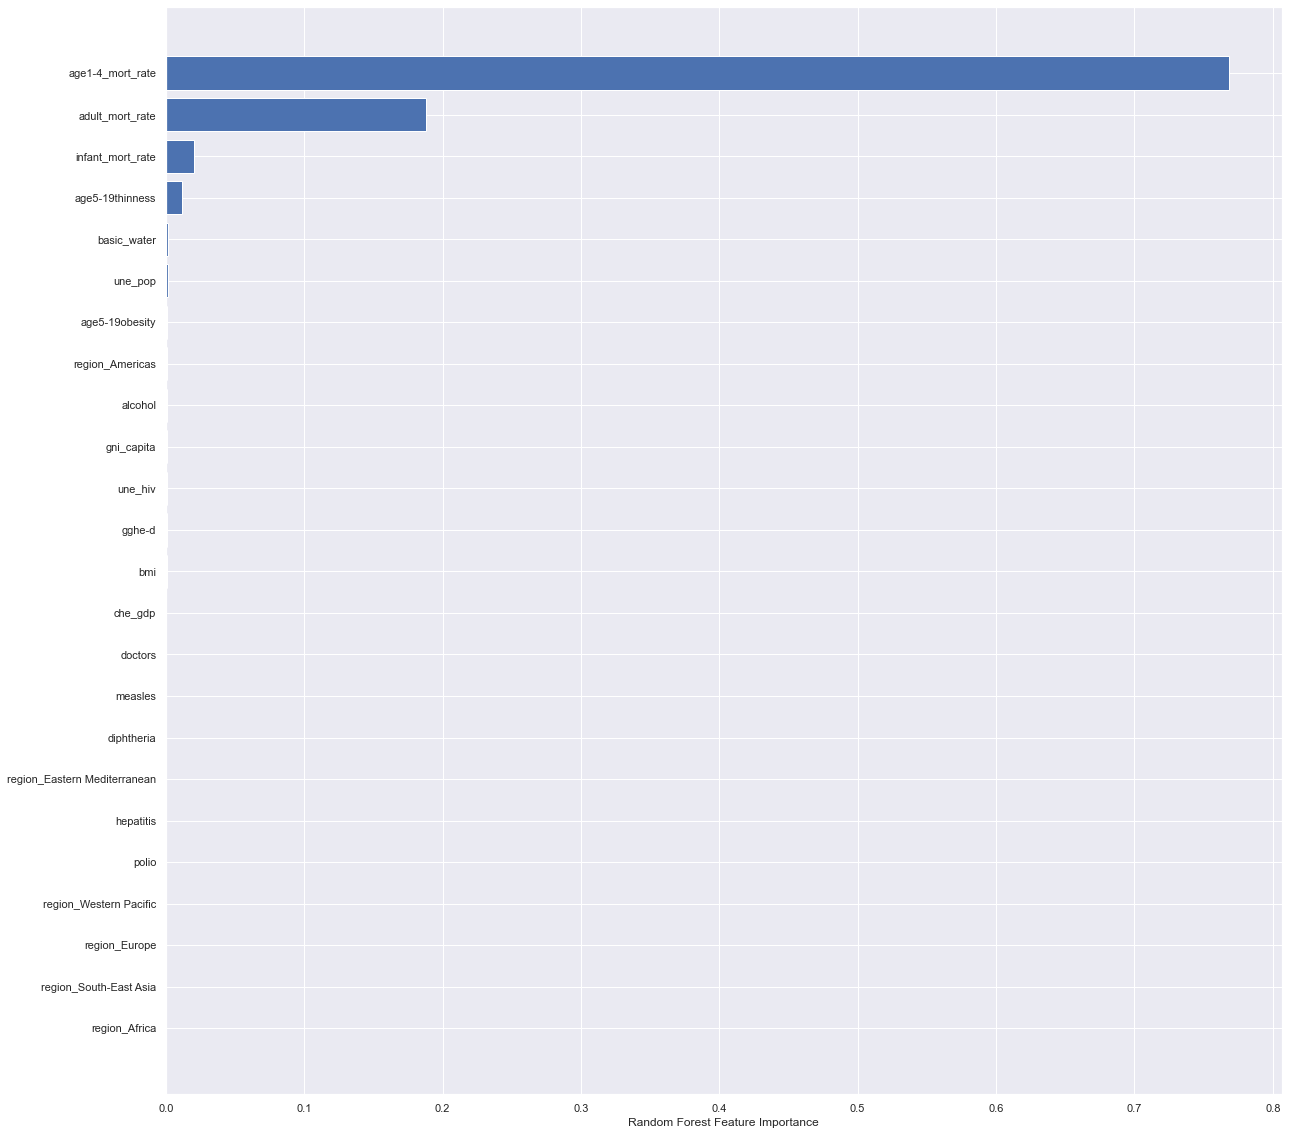

In [90]:
plt.figure(figsize=(20,20))
i = rfr.feature_importances_.argsort()
plt.barh(X_train.columns[i], rfr.feature_importances_[i])
plt.xlabel("Random Forest Feature Importance")

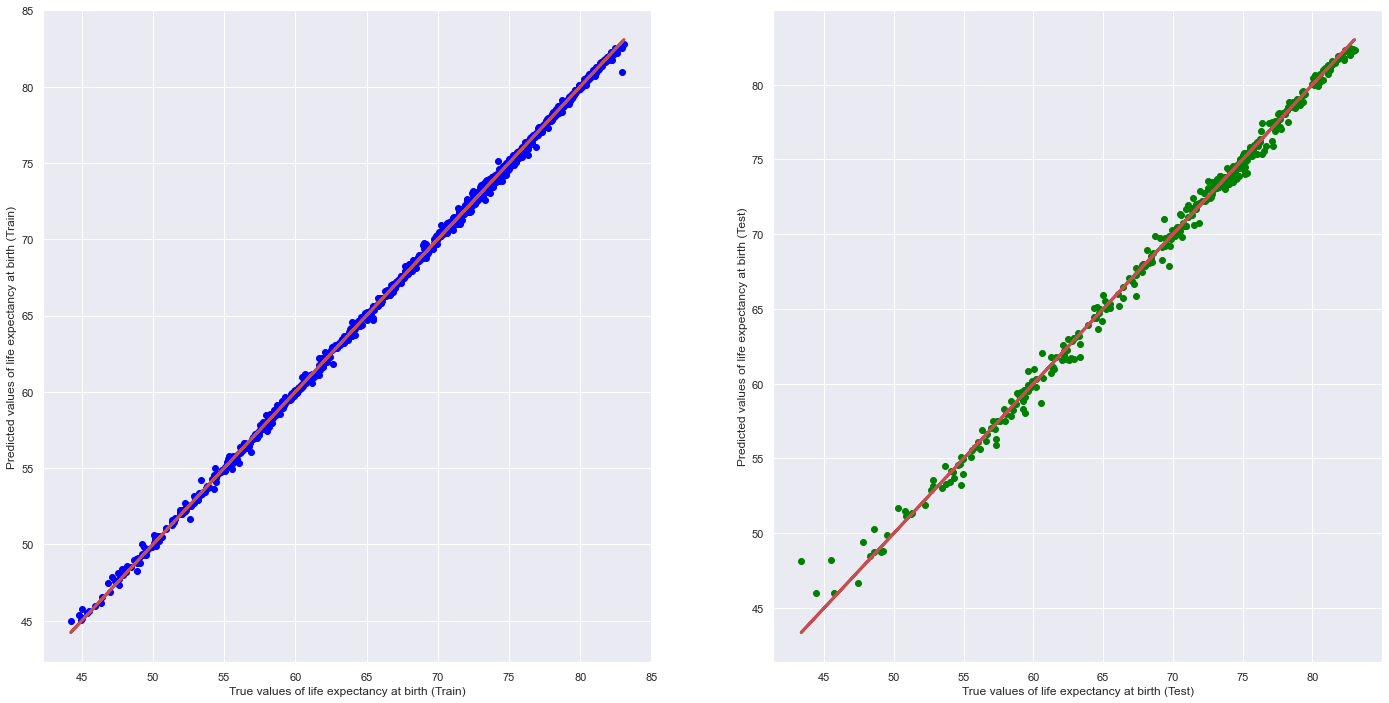

In [91]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [92]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9993377629956113
Mean Squared Error (MSE) 	: 0.05653731101463015

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.995701680377548
Mean Squared Error (MSE) 	: 0.3619863352583631



### Analysing response = life_exp60 dataset

In [94]:
estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))


RandomForestRegressor(max_depth=10, n_estimators=900, random_state=0)
0.967577706620692


In [95]:
rfr60 = RandomForestRegressor(n_estimators = 1000,  max_depth = 8, random_state=0)     

rfr60.fit(X_train, y_train_le60['life_exp60'].ravel())

RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=0)

In [96]:
np.sort(rfr60.feature_importances_)[::-1]

array([6.40803823e-01, 1.79800953e-01, 3.61086579e-02, 2.18151370e-02,
       1.93147350e-02, 1.57334086e-02, 1.46144852e-02, 1.14139971e-02,
       1.05986176e-02, 8.09289624e-03, 7.95561816e-03, 7.41553947e-03,
       7.16432841e-03, 5.06243093e-03, 3.82086125e-03, 3.09008567e-03,
       1.79422490e-03, 1.38551941e-03, 1.24333704e-03, 1.21307008e-03,
       1.08823033e-03, 3.21514361e-04, 9.73347568e-05, 5.11946013e-05])

Text(0.5, 0, 'Random Forest Feature Importance')

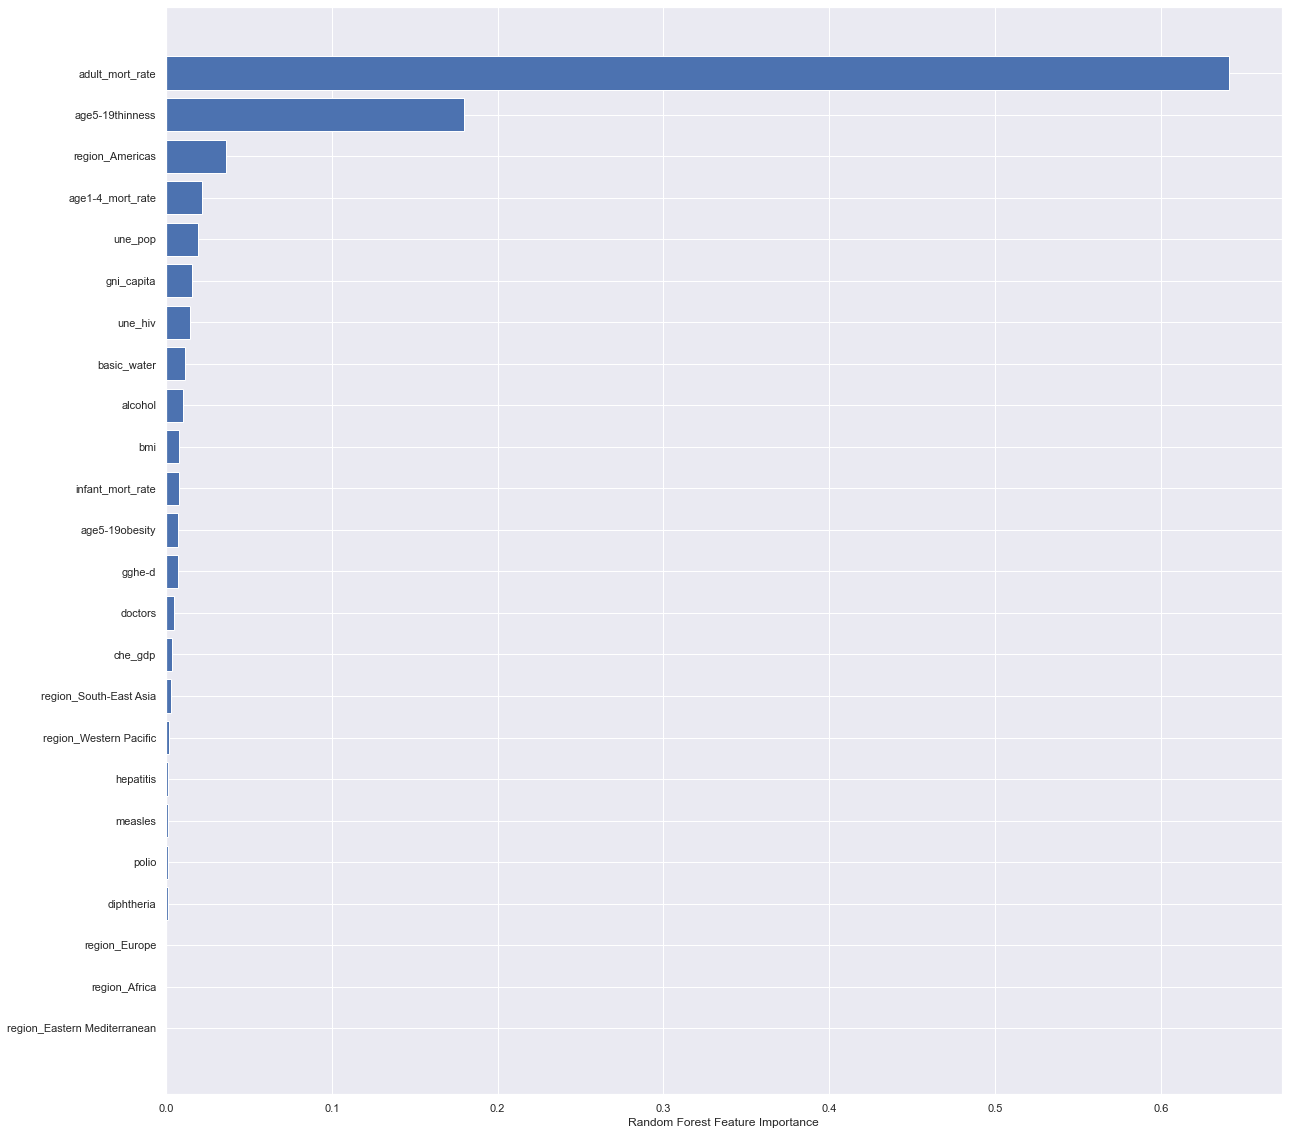

In [97]:
plt.figure(figsize=(20,20))
i = rfr60.feature_importances_.argsort()
plt.barh(X_train.columns[i], rfr60.feature_importances_[i])
plt.xlabel("Random Forest Feature Importance")

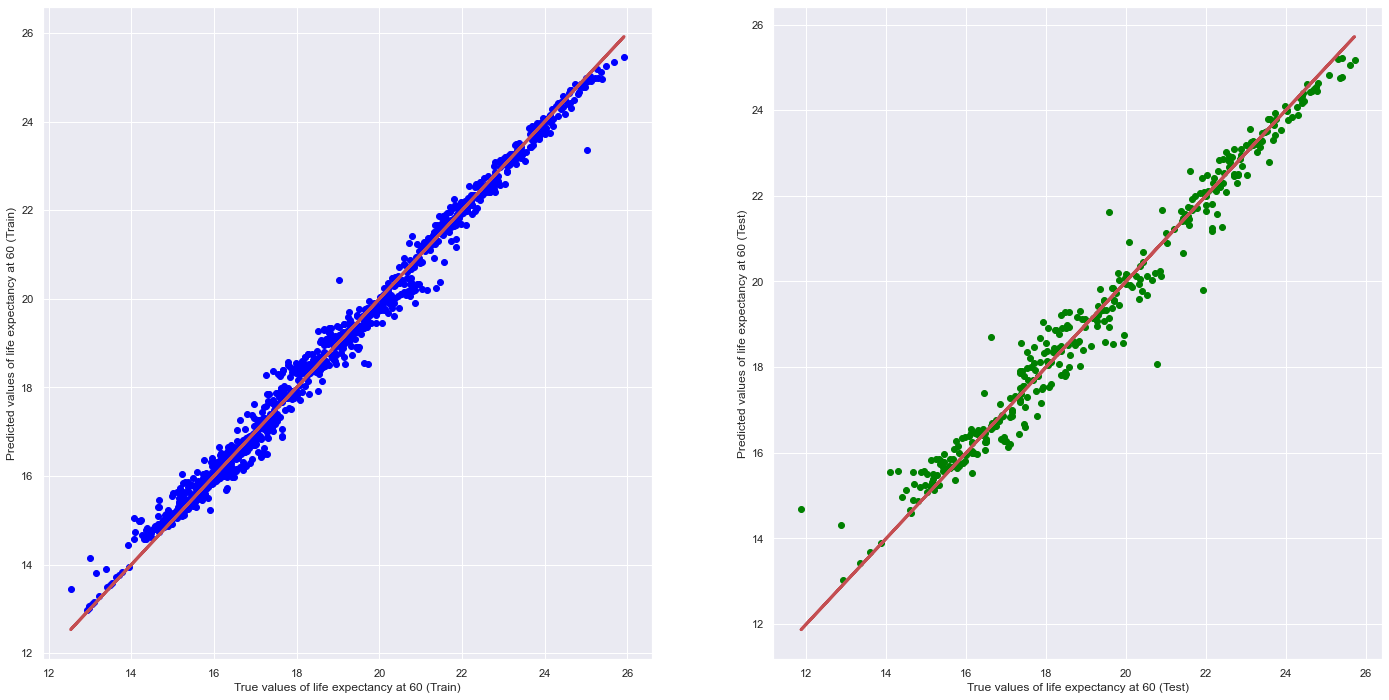

In [98]:
y_train_pred = rfr60.predict(X_train)
y_test_pred = rfr60.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [99]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr60.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr60.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

-----------For Response = life_exp60-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9902340955810426
Mean Squared Error (MSE) 	: 0.08271629425218407

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9728327476397113
Mean Squared Error (MSE) 	: 0.25393485373686064



## Model 3: Gradient Boosting Regressor

### Analysing response = life_expect dataset

In [100]:
print("Train Set for y=life_expect:", y_train_le.shape, X_train.shape)
print("Test Set for y=life_expect:", y_test_le.shape, X_test.shape)
print()
print("Train Set for y=life_exp60:", y_train_le60.shape, X_train.shape)
print("Test Set for y=life_exp60:", y_test_le60.shape, X_test.shape)

Train Set for y=life_expect: (1091, 1) (1091, 24)
Test Set for y=life_expect: (364, 1) (364, 24)

Train Set for y=life_exp60: (1091, 1) (1091, 24)
Test Set for y=life_exp60: (364, 1) (364, 24)


In [1]:
from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

NameError: name 'np' is not defined

In [ ]:
gbr = GradientBoostingRegressor(n_estimators = 90,  max_depth = 5, random_state=0)     

gbr.fit(X_train, y_train_le['life_expect'].ravel())

In [ ]:
np.sort(gbr.feature_importances_ )[::-1]

In [ ]:
plt.figure(figsize=(20,20))
i = gbr.feature_importances_.argsort()
plt.barh(X_train.columns[i], gbr.feature_importances_[i])
plt.xlabel("Gradient Boosting Feature Importance")

In [ ]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [ ]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

### Analysing response = life_exp60 dataset

In [ ]:
estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

In [ ]:
gbr60 = GradientBoostingRegressor(n_estimators = 90,  max_depth = 7, random_state=0)     

gbr60.fit(X_train, y_train_le60['life_exp60'].ravel())

In [ ]:
np.sort(gbr60.feature_importances_)[::-1]

In [ ]:
plt.figure(figsize=(20,20))
i = gbr60.feature_importances_.argsort()
plt.barh(X_train.columns[i], gbr60.feature_importances_[i])
plt.xlabel("Gradient Boosting Feature Importance")

In [ ]:
y_train_pred = gbr60.predict(X_train)
y_test_pred = gbr60.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [ ]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr60.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr60.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

For Random Forest Regressor and Gradient Boosting Regressor, although there is discrepancy between the MSE scores between train and test set, the difference is relatively low ranging from 0.02 to 0.3, we concluded that the model is still acceptable despite overfitting slightly. This is because the MSE of the model on the test dataset is still low which shows that the prediction is still accurate.

# EDA on Regional Life Expectancy

In [ ]:
print("Number of countries for each region: ")
print(df["region"].value_counts()//17)

In [ ]:
sb.catplot(y = "region", kind = "count", data = df)

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

region_names = new_df['region'].unique()

for region in region_names:
    fig = px.line(pd.DataFrame(new_df[new_df['region']==region]), x="year", y="life_expect", title='Life expectancy of countries in ' +region + ' over the years',color='country')
    fig.show()


## Description of each variables for different regions

In [ ]:
# General trends in each region
Africa_df = pd.DataFrame(new_df[new_df['region']=='Africa'])
print("Africa")
display(Africa_df.describe())

Europe_df = pd.DataFrame(new_df[new_df['region']=='Europe'])
print("Europe")
display(Europe_df.describe())

SEA_df = pd.DataFrame(new_df[new_df['region']=='South-East Asia'])
print("South East Asia")
display(SEA_df.describe())

EM_df = pd.DataFrame(new_df[new_df['region']=='Eastern Mediterranean'])
print("Eastern Mediterranean")
display(EM_df.describe())

WP_df = pd.DataFrame(new_df[new_df['region']=='Western Pacific'])
print("Western Pacific")
display(WP_df.describe())

Americas_df = pd.DataFrame(new_df[new_df['region']=='Americas'])
print("Americas")
display(Americas_df.describe())

# General trends in each region


From the mean and line graph we can see the average life expectancies of countries in the 6 regions are different. Our aim is to find out why the life expectancies differ in each region and how we can further improve life expectancies in those regions that are lower. 

The average life expectancy in Africa is 57 years which is the lowest compared to other regions. The region with the highest average life expectancy is Europe which is 75 years. Hence, we want to find out what causes the life expectancy be so drastically different and whether the variables affecting life expectancy are different in different regions. 


From the line graphs above, the life expectancies of most countries in the different regions generally increased over the years.

However, there are some sudden drops in life expectancy in Sri-Lanka in 2004, in Myanmar in 2008, in Haiti in 2010 and in the Syrian Arab Republic in 2014.

Upon further research, we found that the sudden drop in life expectancy was due natural disasters and tragedies. In 2004 a tsunami occurred in Sri Lanka, cyclone Nargis struck Myanmar in 2008, a 7.0 magnitude earthquake occured in Haiti in 2010 and the Syrian Arab Republic was engaged in the syrian war in 2014.

Something to note is that the features do not have a cause and effect relationship with life expectancy as there are many unprecedented circumstances that could alter life expectancy. Hence, our solutions to increase the life expectancy of a region may not always be accurate due to unforeseeable circumstances which would be a limitation to our solution.

## Trend of the life expectancy for different regions from 2000 to 2016

In [ ]:
regionDF = pd.concat([df['region'], df['life_expect'], df['year']], axis = 1).reindex(df['region'].index)

f,axes = plt.subplots(17,1, figsize=(20, 65), sharex=True)

count = 0
year=2000
while count<17:
    tempDF = pd.DataFrame()
    tempDF['region']= regionDF['region']
    tempDF['life_expect'] = regionDF['life_expect']
    tempDF['year'] = regionDF['year']
    to_drop = tempDF[tempDF['year']!=year].index
    tempDF.drop(to_drop, inplace = True)
    sb.boxplot(x = "life_expect", y = "region", data = tempDF, orient = "h", ax=axes[count]).set(title=str(year))
    count += 1
    year+=1

Insights: 
Distributions of life expectancy is distinct for each region as observed in the box-plot from 2000-2016.
From 2000-2016, the median life expectancy at birth for countries in Africa is significantly lower than other regions. 
Life expectancy has generally improved throughout the years as evidenced by the increasing median, higher concentration of data at higher life expectancy levels and a higher minimum life expectancy.

There is an an increase in median life expectancy levels from 2000-2016 for countries in Eastern Mediterranean. Distribution of life expectancy across the countries in the region have become more compact and more concentrated at higher life expectancy levels. 

Other regions show relatively stagnant distributions.

# Relationship between regional life expectancy and numerical variables

### Africa

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(Africa_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
Africa_df.skew()

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=Africa_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The correlation between adult_mort_rate,infant_mort_rate and age1-4_mort_rate and life expectancy in Africa is -0.87,-0.86,-0.78 respectively. These features have the strongest correlation with life expectancy in Africa and the skewness of adult_mort_rate, infant_mort_rate and age1-4_mort_rate is relatively close to 0.

Other features that have high correlation with life expectancy are doctors (0.64) and age5-19obesity (0.57). Both have non-linear relationships with life expectancy. 

Hence, some features that we think will be important for improving life expectancy in Africa are adult_mort_rate,infant_mort_rate, age1-4_mort_rate, doctors and age5-19obesity. 

### Europe

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(Europe_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=Europe_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The features with the highest correlation with life_expect is adult_mort_rate, age5-19thinness, gni_capita, gghe-d and age5-19obesity. 

From the plots the relationship between life_expect and adult_mort_rate and the relationship between life_expect and age5-19thinness is negative, linear and strong. adult_mort_rate has a correlation of -0.92 and age5-19thinness has a correlation of -0.81. 

The relationship between gni_capita and life_expect seems to be non-linear from the plot.gni_capita has a correlation of 0.82 with life_expect.

The relationship between gghe-d and life expectancy and age5-19obesity and life_expect seems to be linear and positive but a weaker one since the points are more spread out. gghe_d and age5-19obesity has a correlation of 0.74 and 0.73 with life_expect respectively. 

Hence, we think that adult_mort_rate, age5-19thinness,gni_capita,gghe-d and age5-19obesity would be important factors for Europe.

### Eastern Mediteranean

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(EM_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
EM_df.skew()

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=EM_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The 5 features with the highest correlation are adult_mort_rate, infant_mort_rate, age1-4_mort_rate, measles vaccination and polio vaccination.

adult_mort_rate, infant_mort_rate and age1-4_mort_rate have negative, linear relationships with life_expect. The correlations of adult_mort_rate, infant_mort_rate and age1-4_mort_rate are -0.97,-0.94,-0.89 repectively.

The correlation of measles, polio and diphtheria vaccinations with life_expect is 0.86, 0.84 and 0.84 respectively. All 3 have a linear and positive relation with life_expect and similar correlations. However, we noted that the data of measles and polio vaccination seemed to less skewed than that of diptheria vaccination. Hence, we chose polio vaccination as a more useful predictor as compared to diphtheria vaccination.

Hence the top 5 hypothesized features that would be important for Eastern Medditeranean are adult_mort_rate, infant_mort_rate, age1-4_mort_rate, measles vaccination and polio vaccination.



### Western Pacific

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(WP_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=WP_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The 5 features with the highest correlation are adult_mort_rate, infant_mort_rate, age1-4_mort_rate, basic_water and gni_capita.

adult_mort_rate, infant_mort_rate, age1-4_mort_rate all have positive, linear relationships with life expectancy and their correlations with life_expect are -0.97,-0.89,-0.81 respectively.

basic_water and gni_capita have non-linear relationships with life expectancy and their correlation with life_expect are 0.80 and 0.70 respectively.

Top 5 features we think would be important are adult_mort_rate, infant_mort_rate, age1-4_mort_rate, basic_water and gni_capita.



### Americas

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(Americas_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=Americas_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The 5 features with high correlation with life_expect is adult_mort_rate, infant_mort_rate , age1-4_mort_rate,basic_water and gghe-d. 

The relationship of life_expect with adult_mort_rate, infant_mort_rate and age1-4_mort_rate are negative and linear. The correlation of adult_mort_rate, infant_mort_rate and age1-4_mort_rate are -0.97,-0.86,-0.79.

The correlation of basic water and gghe-d with life expectancy are at 0.68 and 0.62 respectively which is lower than the correlation of life expectancy with the mortality rates. 

Hence, the top 5 hypothesized features are adult_mort_rate, infant_mort_rate , age1-4_mort_rate,basic_water and gghe-d.


### South East Asia

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(SEA_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=SEA_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The 5 features with high correlation with life_expect is adult_mort_rate, infant_mort_rate , age1-4_mort_rate, measles vaccination and diptheria vaccination. 

The relationship between adult_mort_rate, infant_mort_rate , age1-4_mort_rate with life_expect is linear and negative. The correlation of adult_mort_rate, infant_mort_rate , age1-4_mort_rate are -0.85,-0.92 and -0.91 repectively. 

The relationship between measles vaccination and diptheria vaccination with life_expect seems to be non-linear and positive. The correlation of measles and diptheria vaccination with life_expect is 0.77 and 0.75 respectively.

Hence our top 5 hypothesized important features are adult_mort_rate, infant_mort_rate , age1-4_mort_rate, measles vaccination and diptheria vaccination. 



## Machine Learning on Regional Life Expectancy

We used gradient boosting regression as model to train the datasets for regional life expectancy in order to predict the top 5 most important predictors.

In [ ]:
regionList = [Africa_df, Europe_df, WP_df, SEA_df, EM_df, Americas_df]

In [ ]:
gbrList = []
for region in regionList:
    area = region['region'].iloc[0]
    print("----------" , area,"----------")
    region = region.drop(['year','country','region'],axis=1).dropna()
    y_le_region = pd.DataFrame(region['life_expect'])
    X_region = pd.DataFrame(region.drop(['life_expect', 'life_exp60'], axis=1))

    X_train, X_test, y_train_le, y_test_le = train_test_split(X_region, y_le_region, test_size = 0.25, random_state = 42)

    print("Train Set:", y_train_le.shape, X_train.shape)
    print("Test Set:", y_test_le.shape, X_test.shape)
    print()
    
    estimator = GradientBoostingRegressor(random_state=0) 
    param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}
    grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')
    grid.fit(X_train, y_train_le['life_expect'].ravel())

    gbr = grid.best_estimator_     
    gbr.fit(X_train, y_train_le['life_expect'].ravel())
    
    y_train_pred = gbr.predict(X_train)
    y_test_pred = gbr.predict(X_test)

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train_le))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
    print()

    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test_le))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
    print()
    dummy = (gbr.feature_importances_ ,area)
    gbrList.append(dummy)
    print(np.sort(gbr.feature_importances_)[::-1])
    print()

In [ ]:
f,axes = plt.subplots(6,1, figsize=(20,60))
k=0

for gbr in gbrList:
    i = gbr[0].argsort()
    sb.barplot(y=X_train.columns[i], x=gbr[0][i], ax = axes[k]).set(title = gbr[1])
    plt.xlabel("Gradient Boosting Feature Importance")
    k+=1

Regions such as Africa, Europe, Western Pacific, Eastern Mediterranean and Americas have the same top 3 predictors which are mortality rates. However, we noticed that the rank as well as the feature importance weightage of each predictor varies depending on the region. 

The only difference is for SEA which has 'doctors' as the most important predictor but the correlation between doctor and life expectancy is relatively low at about -0.27. 

We think that this might due to the problem of overfitting. The huge difference between the MSE value for train data which is 0.00468 and test data which is 0.643 shows that there might be overfitting in the train data which may be caused by the small dataset of size 75 that results in a lack of data used to train the model. Although there is a difference between the MSE value for train and test data, MSE values are still considered relatively low for test data so we think that it is acceptable.

